# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [16]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [17]:
import maze_helper as mh

small_maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", small_maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(small_maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

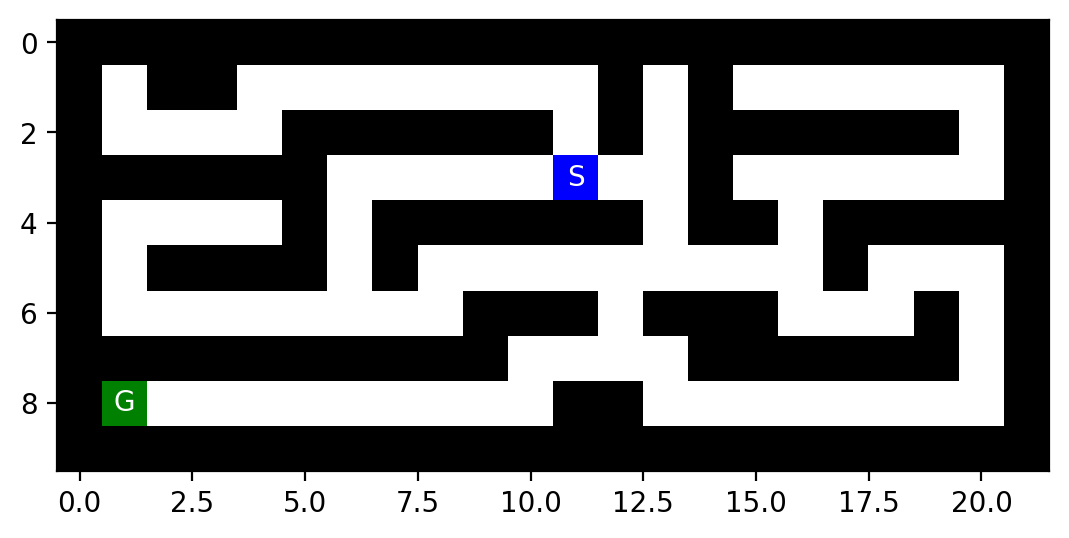

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(small_maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [19]:
print("Start location:", mh.find_pos(small_maze, what = "S"))
print("Goal location:", mh.find_pos(small_maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /Users/michaelamberg/PycharmProjects/Michael-Amberg-CS7320-fork/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [198]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.visited= False

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def __eq__(self, other):
        return self.pos == other.pos

    # this occurs in the priority queue, and only occurs when the two are equal. So doesnt really matter.
    def __lt__(self, other):
        return True

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)



If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

#### Initial state
The initial state of the model is the state description of the starting point. For this program, the inital state will be the (x,y) coordinates given to us by the point *S* in the maze.

#### Actions
'Actions' defines the set of all possible actions *A* the agent may take. The actions for our agent are moving positions either North, East, South, or West

#### Transition Model
This is the function that describes the new state that results from performing an action.
*f* = *S* x *A* -> *S*,   ( Where S is the set of states, aka the position of our agent after moving.)

#### Goal State
The goal state is the point where the maze coordinates = G.
We can find this using ' mh.find_pos(maze, what = "G") '

#### Path Cost
The path cost will be the total steps our agent takes to get from the initial state to the goal state.
It is the sum of all non-negative step costs

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

$n$ - To determine the approximate state space, I would multiply the maze *height-2* by the maze *width-2.* The reason for subtracting 2 from both variables is to account for the fact that the first and last rows/columns are composed entirely of walls, so our agent could not move there. If you want to determine the exact state space, running a breadth first search and running until there are no moves left and returning the total moves made would find the exact space.
<br>

$d$ - To find the depth of the optimal solution, running a breadth first search would guarantee that the optimal solution is found. The length of the path taken would be the depth of the solution.
<br>

$m$ - The max tree depth can be estimated by finding the worst possible sol ******************
<br>

$b$ - The maximum branching factor is 4, which would be possible if the agent were in an open space and could go any cardinal direction.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [57]:
# load the different mazes
with open("empty_maze.txt", "r") as f:
    maze_str = f.read()
empty_maze = mh.parse_maze(maze_str)

with open("empty_2_maze.txt", "r") as f:
    maze_str = f.read()
empty_maze2 = mh.parse_maze(maze_str)

with open("L_maze.txt", "r") as f:
    maze_str = f.read()
L_maze = mh.parse_maze(maze_str)

with open("large_maze.txt", "r") as f:
    maze_str = f.read()
large_maze = mh.parse_maze(maze_str)

with open("loops_maze.txt", "r") as f:
    maze_str = f.read()
loops_maze = mh.parse_maze(maze_str)

with open("medium_maze.txt", "r") as f:
    maze_str = f.read()
medium_maze = mh.parse_maze(maze_str)

with open("open_maze.txt", "r") as f:
    maze_str = f.read()
open_maze = mh.parse_maze(maze_str)

In [314]:
import random

class searchTree:

  def __init__(self, maze):
    self.start_state = Node(mh.find_pos(maze,"S"),None,None,0)
    self.frontier = [self.start_state]
    self.visited = [self.start_state]
    self.number_of_steps = 0
    self.path = []

  def insert_to_frontier(self, node):
    # Insert a node at the end of the frontier
    self.frontier.append(node)


  def remove_from_frontier(self):
    # Remove a node from the beginning of the frontier
    # Then add the removed node to the checked_nodes list
    first_node = self.frontier.pop(0)
    self.visited.append(first_node)
    return first_node

  def LIFO_frontier(self):
      return self.frontier.pop()


  def frontier_is_empty(self):
    #Check if the frontier is empty, so no solution found
    if len(self.frontier) == 0:
      return True
    return False


  def expand(self, node, maze):
    #Extends the current node, creating a new instance of MazeNode for each edge starts from the current node
    pos = node.pos
    newNodes = []
    # looks to see if the new Node is able to be traveled to
    # also acts as the transition function for each node
    # is randomized to help against repeat errors / cycles
    if mh.look(maze,(pos[0]-1,pos[1])) !="X": newNodes.append(Node((pos[0]-1,pos[1]),node,"N",node.cost+1))
    if mh.look(maze,(pos[0]+1,pos[1])) !="X": newNodes.append(Node((pos[0]+1,pos[1]),node,"S",node.cost+1))
    if mh.look(maze,(pos[0],pos[1]+1)) !="X": newNodes.append(Node((pos[0],pos[1]+1),node,"E",node.cost+1))
    if mh.look(maze,(pos[0],pos[1]-1)) !="X": newNodes.append(Node((pos[0],pos[1]-1),node,"W",node.cost+1))
    random.shuffle(newNodes)
    return newNodes

In [315]:
def BFS(maze):
    maze_copy = maze.copy()
    search_tree = searchTree(maze)
    nodes_expanded = 0
    memory_used = 0
    max_depth = 0
    max_frontier = 0
    num_steps = 0
    while True:
      num_steps += 1
      # print(f"Step: {self.number_of_steps}, Frontier Size: {len(self.frontier)} ")
      if search_tree.frontier_is_empty():
        print(f"No Solution Found after {num_steps} steps")
        break

      if len(search_tree.frontier) > max_frontier: max_frontier = len(search_tree.frontier)
      if len(search_tree.frontier)+len(search_tree.visited) > memory_used: memory_used = len(search_tree.frontier) + len(search_tree.visited)

        # pop node from frontier stack, add to visited
      selected_node = search_tree.remove_from_frontier()
      if maze_copy[selected_node.pos] == ' ': maze_copy[selected_node.pos] = '.'

      # extend the node
      new_nodes = search_tree.expand(selected_node,maze)

      # add the extended nodes in the frontier
      if len(new_nodes) > 0:
        for new_node in new_nodes:
            nodes_expanded+=1
            if new_node.cost > max_depth: max_depth = new_node.cost
            #print(new_node)
            if mh.look(maze,new_node.pos) == "G":
                print(f"Solution Found in {num_steps} steps. Solution cost is {new_node.cost}")
                print(f"path cost: {selected_node.cost} | Nodes expanded: {nodes_expanded} | Max tree depth {max_depth}")
                print(f"max nodes in memory: {memory_used} | Max frontier size: {max_frontier}")
                for path in new_node.parent.get_path_from_root():
                    if mh.look(maze_copy,path.pos) =="." : maze_copy[path.pos] = "P"
                return maze_copy

            elif new_node not in search_tree.frontier and new_node not in search_tree.visited:
                search_tree.insert_to_frontier(new_node)




## Breadth First Search Results

Solution Found in 90 steps. Solution cost is 19
path cost: 18 | Nodes expanded: 183 | Max tree depth 19
max nodes in memory: 92 | Max frontier size: 8


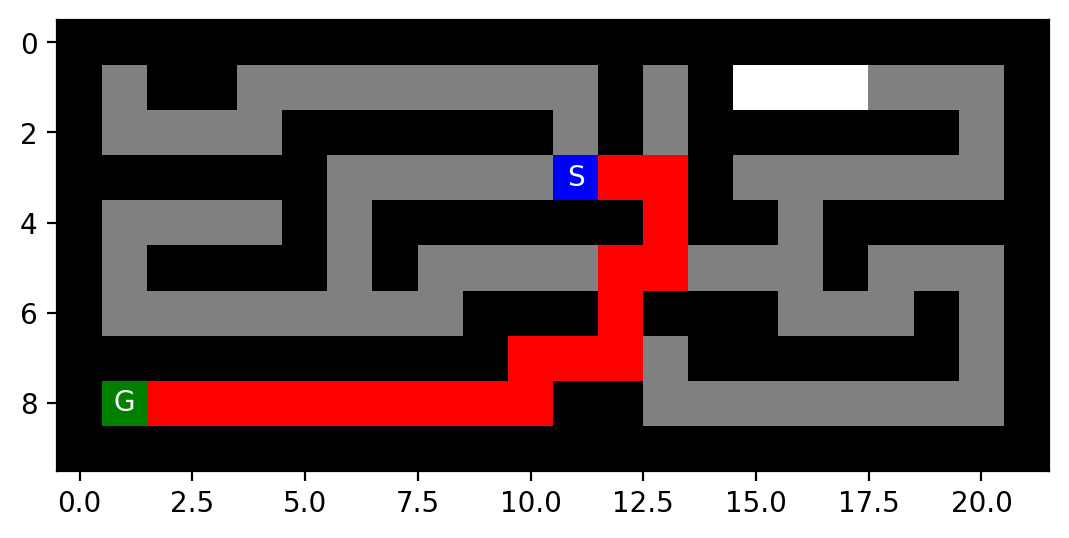

In [317]:
mh.show_maze(BFS(small_maze))

Solution Found in 266 steps. Solution cost is 68
path cost: 67 | Nodes expanded: 545 | Max tree depth 68
max nodes in memory: 270 | Max frontier size: 9


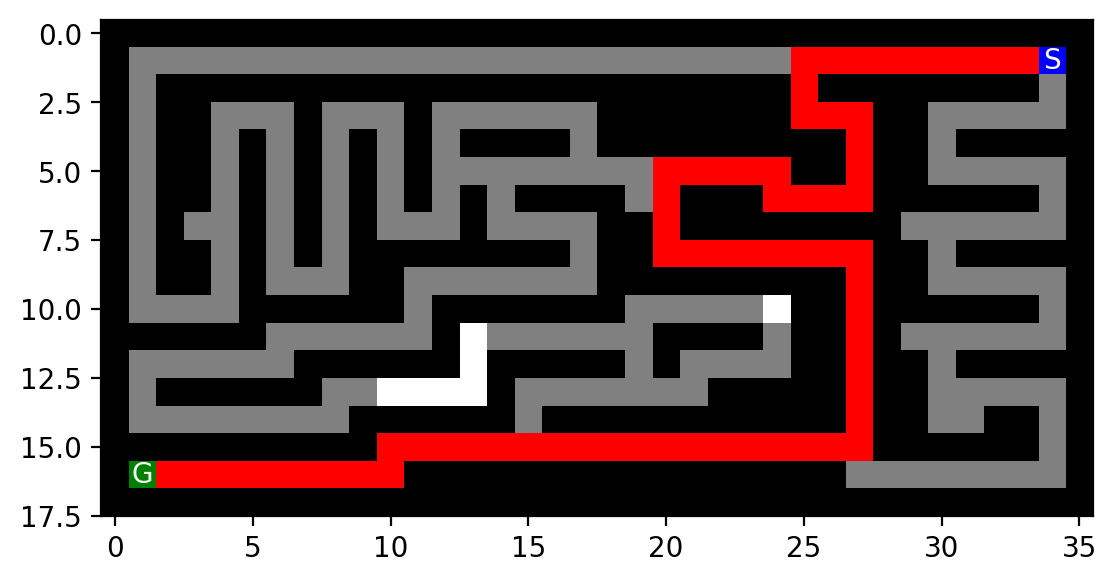

In [318]:
mh.show_maze(BFS(medium_maze))

Solution Found in 619 steps. Solution cost is 210
path cost: 209 | Nodes expanded: 1239 | Max tree depth 210
max nodes in memory: 623 | Max frontier size: 8


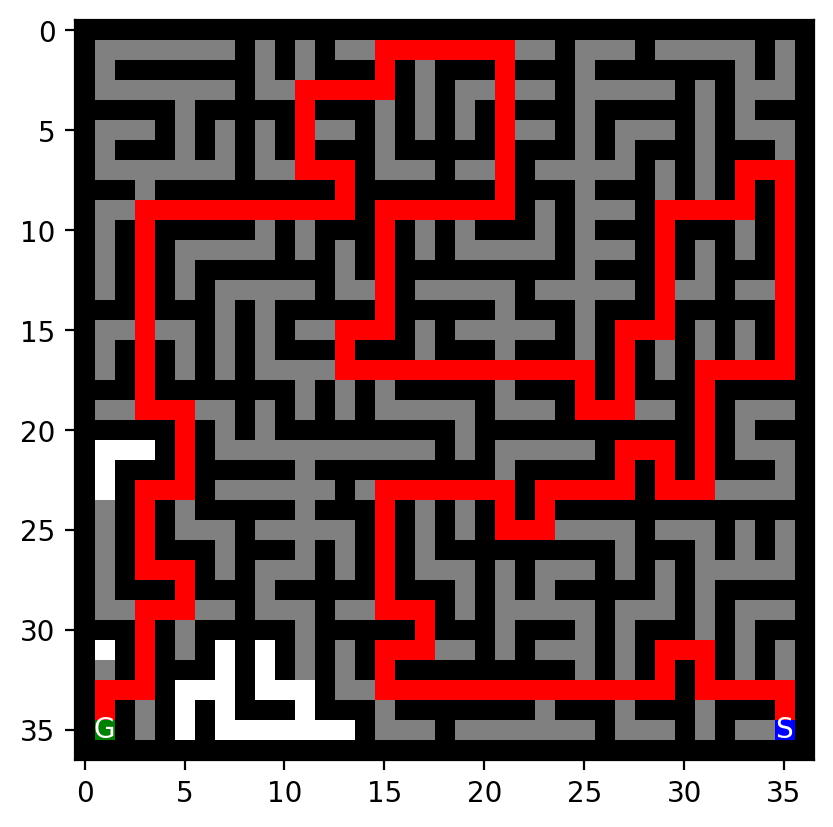

In [319]:
mh.show_maze(BFS(large_maze))

Solution Found in 681 steps. Solution cost is 54
path cost: 53 | Nodes expanded: 2515 | Max tree depth 54
max nodes in memory: 684 | Max frontier size: 25


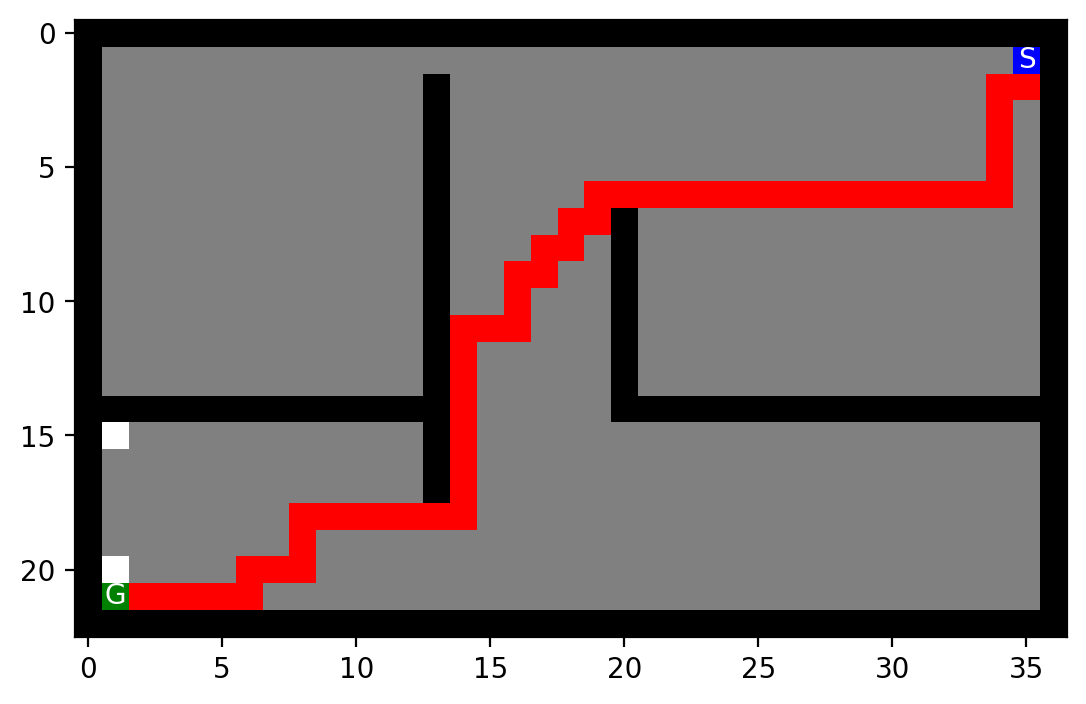

In [320]:
mh.show_maze(BFS(open_maze))

Solution Found in 70 steps. Solution cost is 23
path cost: 22 | Nodes expanded: 180 | Max tree depth 23
max nodes in memory: 72 | Max frontier size: 8


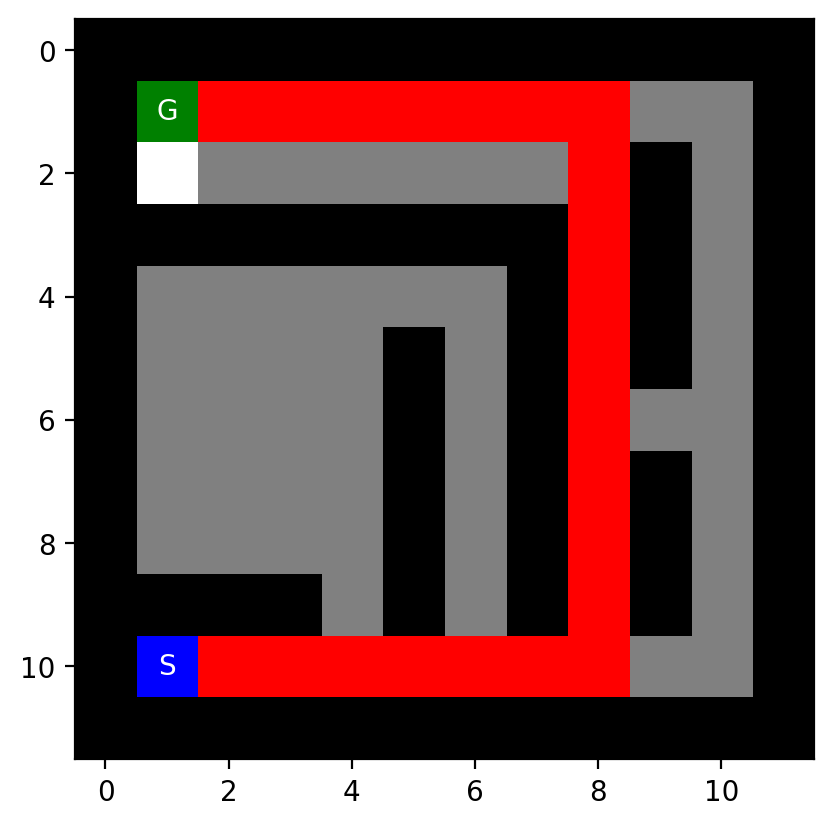

In [321]:
mh.show_maze(BFS(loops_maze))

Solution Found in 136 steps. Solution cost is 14
path cost: 13 | Nodes expanded: 484 | Max tree depth 14
max nodes in memory: 143 | Max frontier size: 18


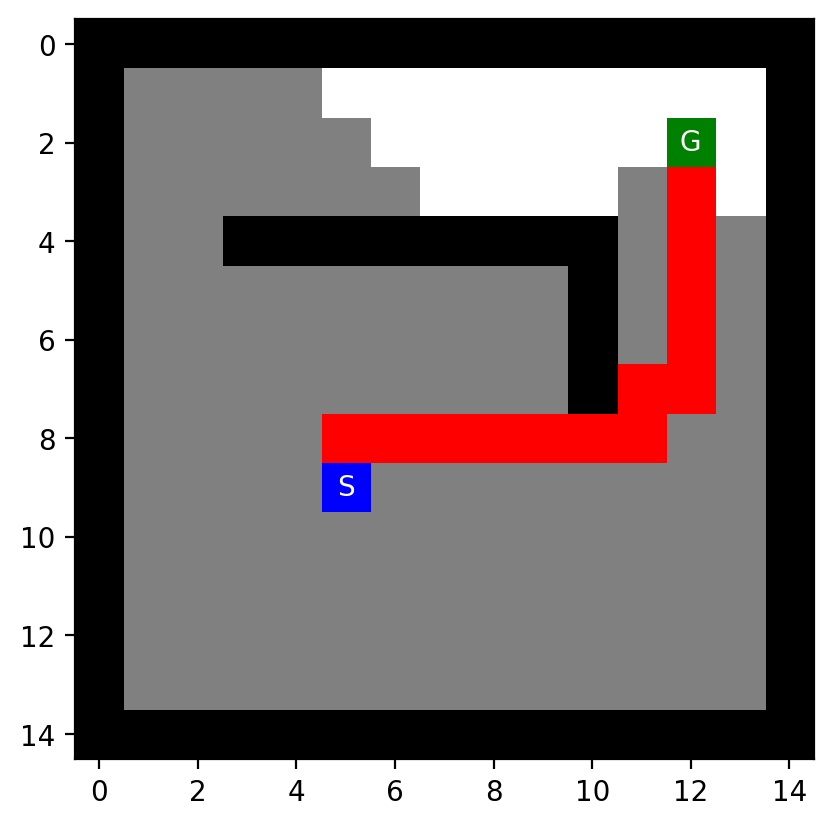

In [322]:
mh.show_maze(BFS(L_maze))

Solution Found in 92 steps. Solution cost is 14
path cost: 13 | Nodes expanded: 335 | Max tree depth 14
max nodes in memory: 96 | Max frontier size: 12


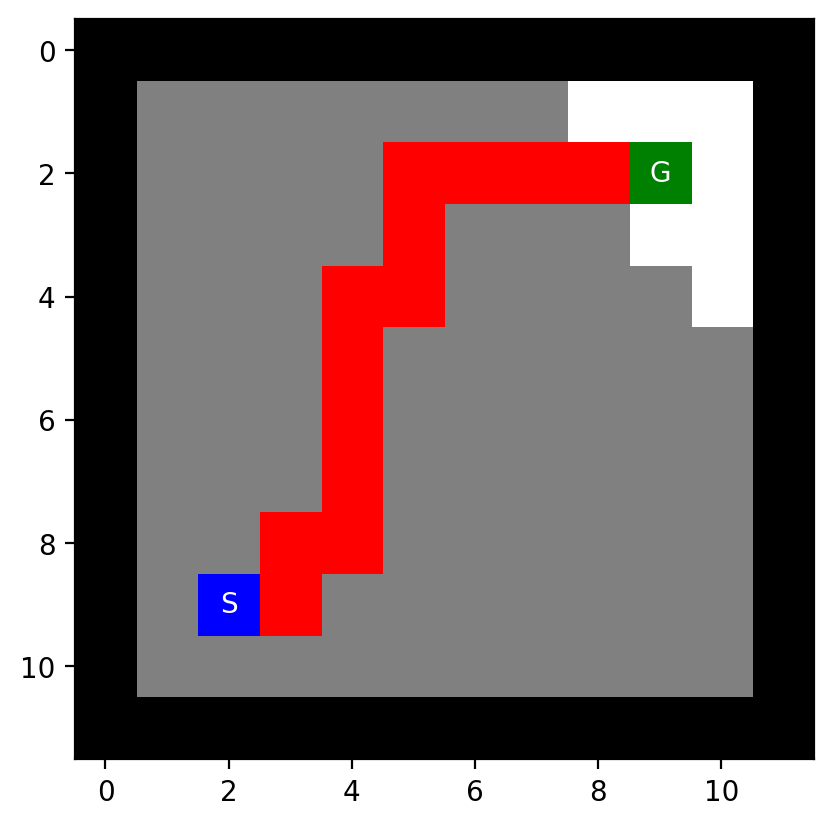

In [323]:
mh.show_maze(BFS(empty_maze))

Solution Found in 91 steps. Solution cost is 14
path cost: 13 | Nodes expanded: 331 | Max tree depth 14
max nodes in memory: 95 | Max frontier size: 12


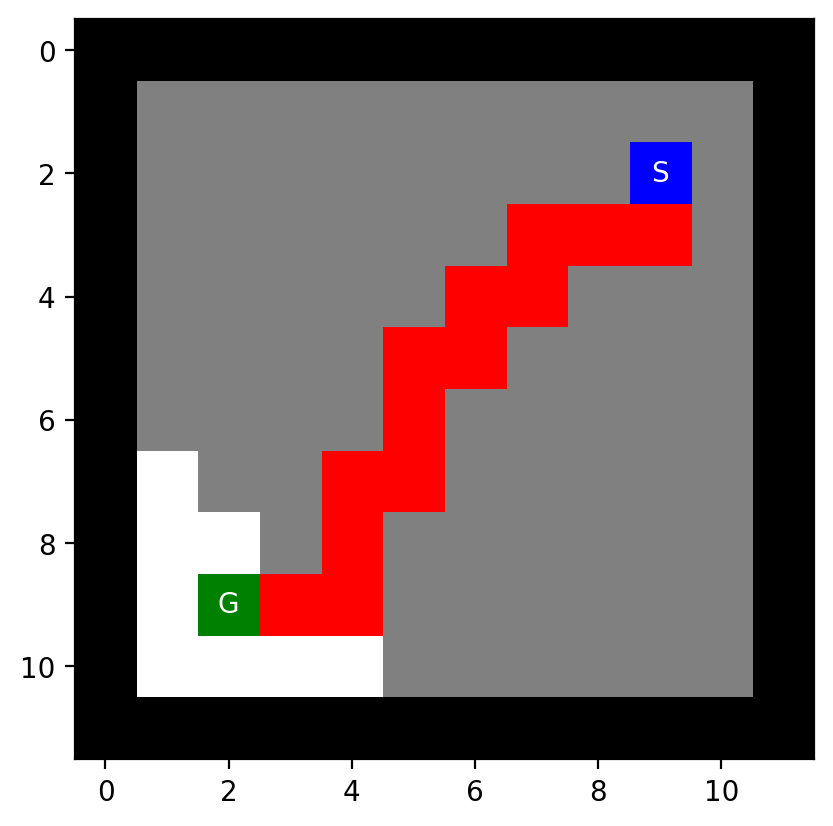

In [324]:
mh.show_maze(BFS(empty_maze2))

In [325]:
def DFS(maze):
    maze_copy = maze.copy()
    search_tree = searchTree(maze)
    nodes_expanded = 0
    memory_used = 0
    max_depth = 0
    max_frontier = 0
    num_steps = 0
    while True:
      num_steps += 1
      if search_tree.frontier_is_empty() or num_steps == 200000:
        print(f"No Solution Found after {num_steps} steps")
        print(f"path cost: NA | Nodes expanded: {nodes_expanded} | Max tree depth {max_depth}")
        print(f"max nodes in memory: {memory_used} | Max frontier size: {max_frontier}")
        return maze_copy

      if len(search_tree.frontier) > max_frontier: max_frontier = len(search_tree.frontier)
      if len(search_tree.frontier)+len(search_tree.visited) > memory_used: memory_used = len(search_tree.frontier) + len(search_tree.visited)

        # pop node from frontier stack, add to visited
      selected_node = search_tree.LIFO_frontier()

      #checks for goal state
      if mh.look(maze,selected_node.pos) == "G":
                print(f"Solution Found in {num_steps} steps. Solution cost is {selected_node.cost}")
                print(f"path cost: {selected_node.cost} | Nodes expanded: {nodes_expanded} | Max tree depth {max_depth}")
                print(f"max nodes in memory: {memory_used} | Max frontier size: {max_frontier}")
                for path in selected_node.parent.get_path_from_root():
                    if mh.look(maze_copy,path.pos) =="." : maze_copy[path.pos] = "P"
                return maze_copy

      if maze_copy[selected_node.pos] == ' ': maze_copy[selected_node.pos] = '.'

        #cycle checking, needs to avoid doing it against the rootnode tho
      if selected_node.parent is None:
          new_nodes = search_tree.expand(selected_node,maze)
          # add the extended nodes in the frontier
          for new_node in new_nodes:
            nodes_expanded+=1
            if new_node.cost > max_depth: max_depth = new_node.cost
            search_tree.insert_to_frontier(new_node)

      elif selected_node not in selected_node.parent.get_path_from_root():
          new_nodes = search_tree.expand(selected_node,maze)
          # add the extended nodes in the frontier
          for new_node in new_nodes:
              nodes_expanded+=1
              if new_node.cost > max_depth: max_depth = new_node.cost
              if new_node not in search_tree.frontier:
                search_tree.insert_to_frontier(new_node)


## DFS Results

Solution Found in 95 steps. Solution cost is 19
path cost: 19 | Nodes expanded: 109 | Max tree depth 39
max nodes in memory: 36 | Max frontier size: 35


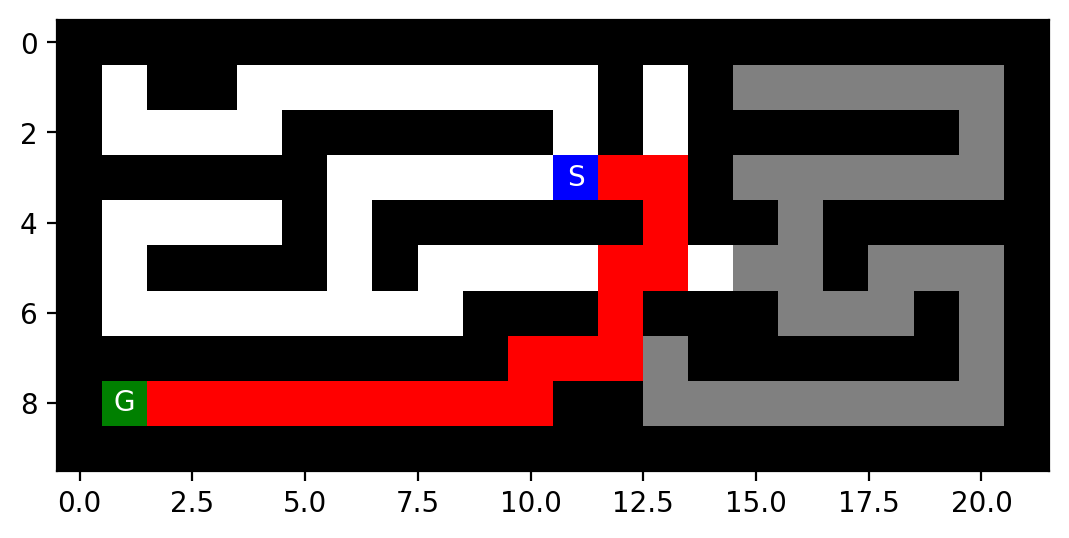

In [326]:
mh.show_maze(DFS(small_maze))

Solution Found in 3129 steps. Solution cost is 74
path cost: 74 | Nodes expanded: 3228 | Max tree depth 240
max nodes in memory: 138 | Max frontier size: 137


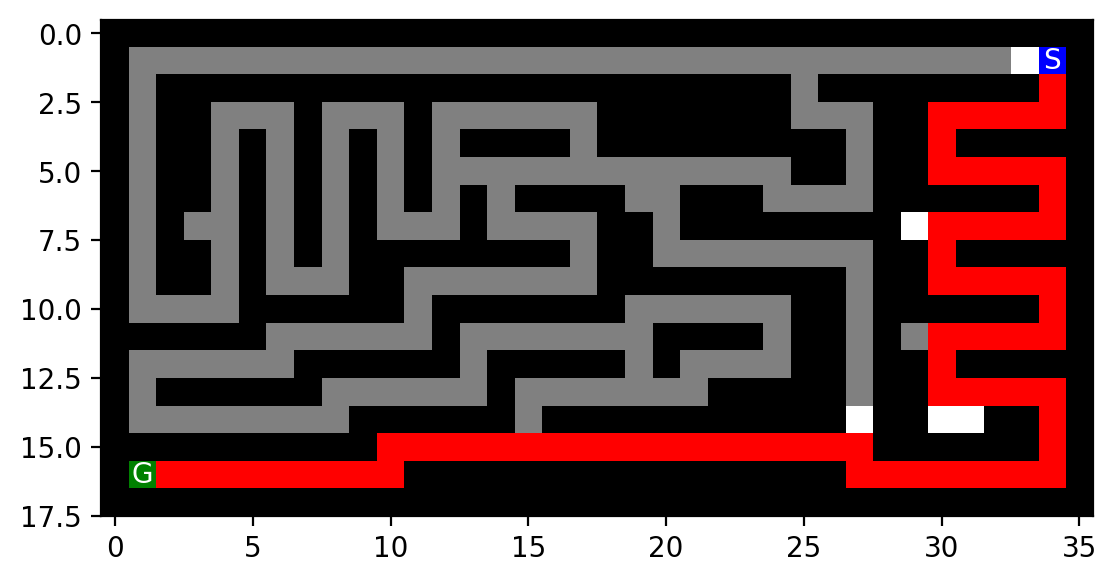

In [327]:
mh.show_maze(DFS(medium_maze))

Solution Found in 880 steps. Solution cost is 210
path cost: 210 | Nodes expanded: 998 | Max tree depth 223
max nodes in memory: 130 | Max frontier size: 129


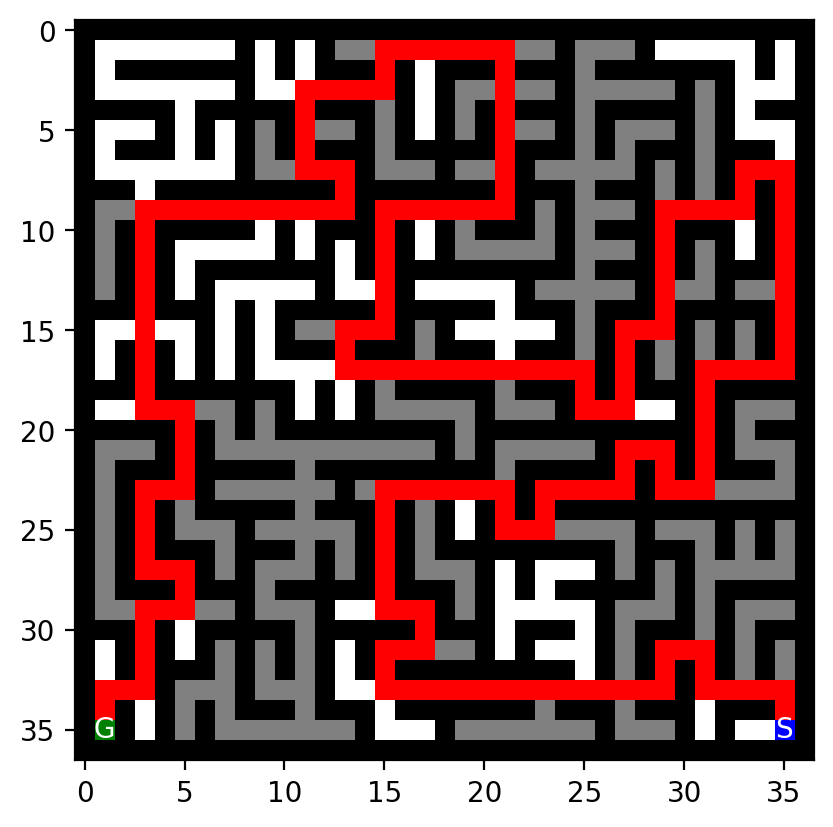

In [328]:
mh.show_maze(DFS(large_maze))

No Solution Found after 200000 steps
path cost: NA | Nodes expanded: 316055 | Max tree depth 121
max nodes in memory: 191 | Max frontier size: 190


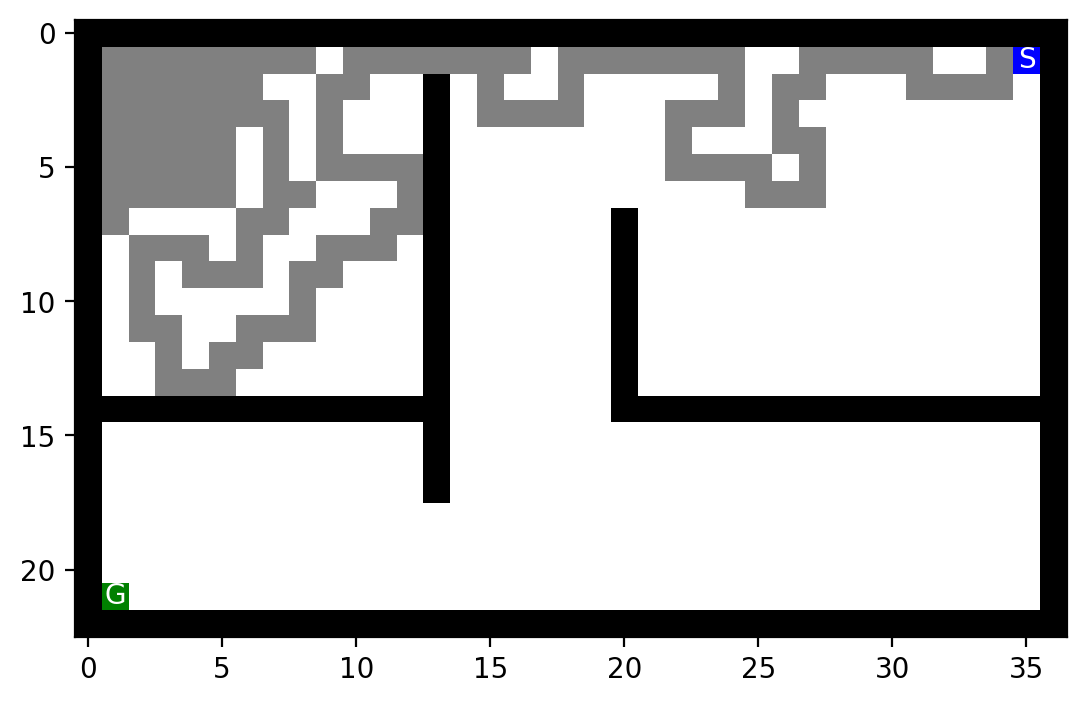

In [329]:
mh.show_maze(DFS(open_maze))

Solution Found in 95 steps. Solution cost is 47
path cost: 47 | Nodes expanded: 146 | Max tree depth 47
max nodes in memory: 37 | Max frontier size: 36


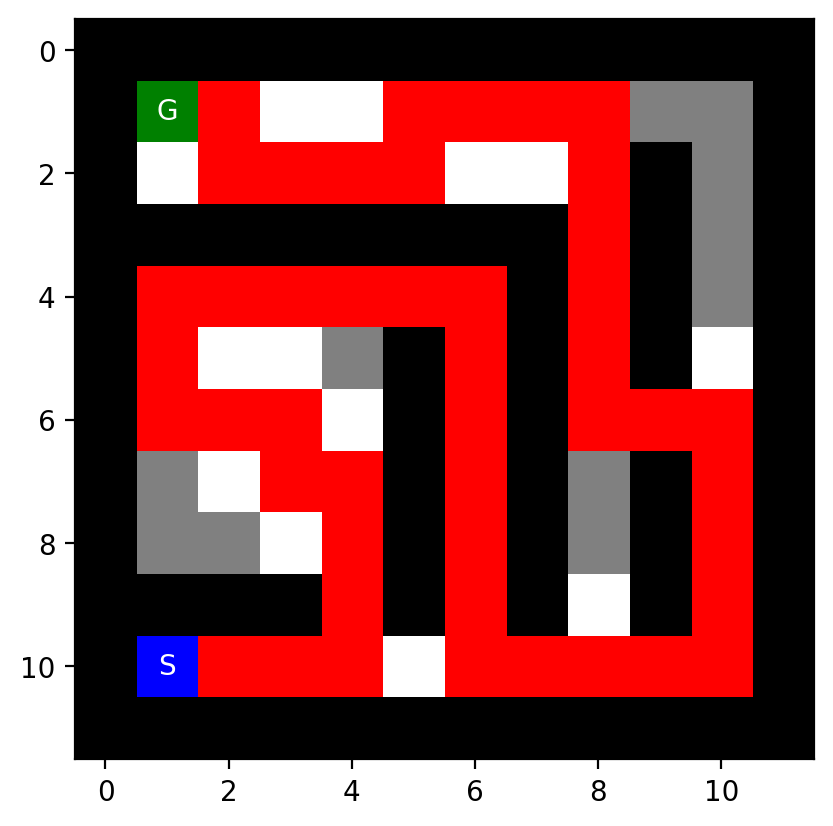

In [330]:
mh.show_maze(DFS(loops_maze))

Solution Found in 4551 steps. Solution cost is 60
path cost: 60 | Nodes expanded: 6941 | Max tree depth 84
max nodes in memory: 108 | Max frontier size: 107


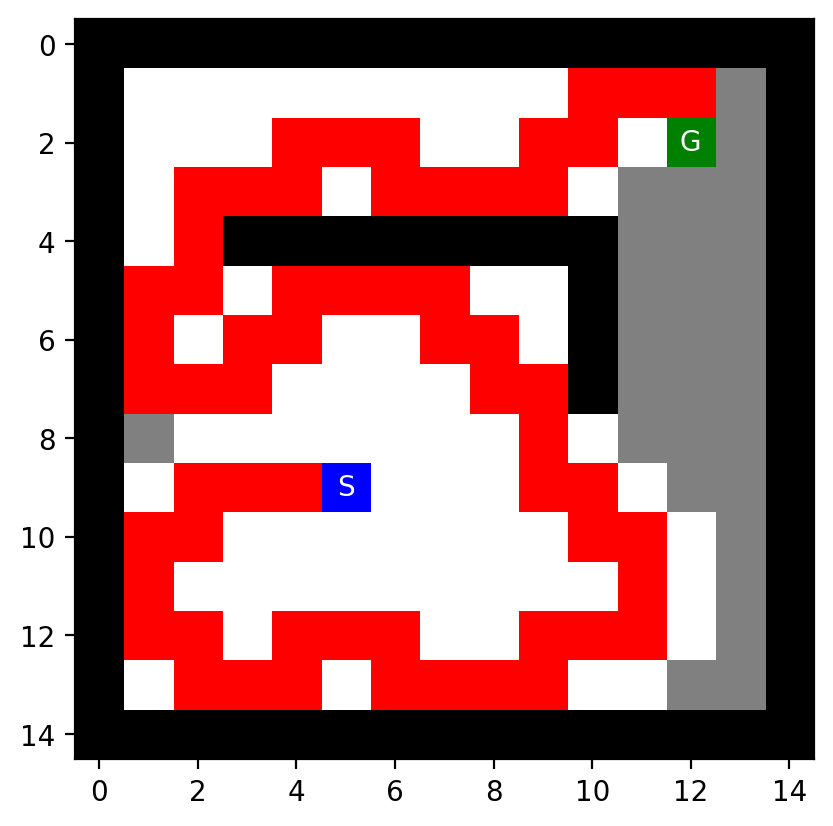

In [331]:
mh.show_maze(DFS(L_maze))

Solution Found in 79 steps. Solution cost is 46
path cost: 46 | Nodes expanded: 174 | Max tree depth 46
max nodes in memory: 65 | Max frontier size: 64


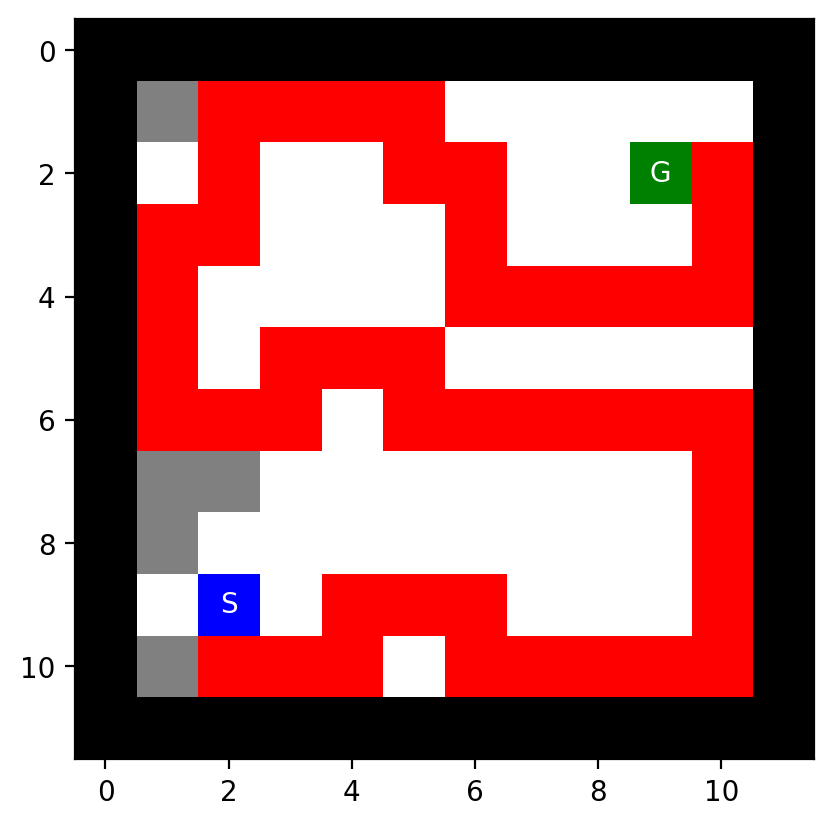

In [332]:
mh.show_maze(DFS(empty_maze))

Solution Found in 73 steps. Solution cost is 40
path cost: 40 | Nodes expanded: 181 | Max tree depth 45
max nodes in memory: 74 | Max frontier size: 73


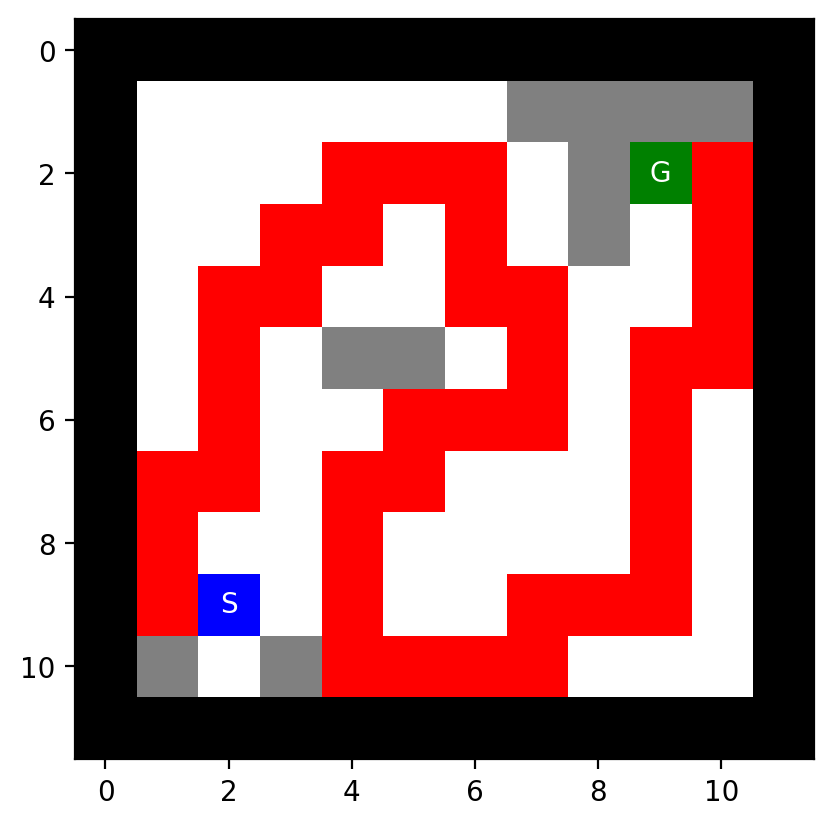

In [335]:
mh.show_maze(DFS(empty_maze))

How does BFS and DFS deal with loops (cycles)?

# Discussion
BFS prevents loops by keeping track of a visited data structure to check expanded nodes against. If the node has already been visited or if the node is in the frontier, then the algorithm will not try it again.
<br>
DFS cycle checking is done by comparing the children of the expanded frontier node against the path currently taken. If the child is in the path, it is not added and a cycle is prevented. However, the path can get stuck if it enters an area with no easy way out.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

# Discussion
My BFS implementation is both complete and optimal. It runs in $O(b^d)$ time since it goes through almost all possible states in the state space. Because it stores all of these nodes, it takes $O(b^d)$ space as well.
<br>
The DFS implementation is not optimal, and not complete. The algorithm returns the first solution it finds, which may not be optimal. It runs into errors in mazes where there are open spaces, so it can potentially get caught in a loop and not find a solution within a finite amount of steps.
It takes up $O(b^m)$ time in the worst case since it can follow the path using max depth in tree. Because it does not keep a reached data structure, it takes up $O(bm)$ space.
<br>
(b = maximum branching factor, d = depth of optimal solution, m = max depth of tree)

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [336]:
# returns the manhattan distance - the difference in x + difference in y
def heuristic(node, goal):
    return abs(node.pos[0] - goal.pos[0]) + abs(node.pos[1] - goal.pos[1])

In [337]:
import heapq

def GBFS(maze):
    maze_copy = maze.copy()
    search_tree = searchTree(maze)
    final = Node(mh.find_pos(maze,"G"),None,None,10) # is just the coords
    start = Node(mh.find_pos(maze,"S"), None,None,0)
    frontier = []
    reached = [start]
    heapq.heappush(frontier, (heuristic(start,final), start)) # should be correct?

    nodes_expanded = 0
    memory_used = 0
    max_depth = 0
    max_frontier = 0
    num_steps = 0
    while True:
      num_steps += 1
      if search_tree.frontier_is_empty() or num_steps == 100000:
        print(f"No Solution Found after {num_steps} steps")
        return maze_copy

      if len(frontier) > max_frontier: max_frontier = len(frontier)
      if len(frontier)+len(reached) > memory_used: memory_used = len(frontier) + len(reached)

        # pop node from frontier stack, add to visited
      selected_node = frontier.pop(0)[1] # should be

      # checks for goal state
      if mh.look(maze,selected_node.pos) == "G":
                print(f"Solution Found in {num_steps} steps. Solution cost is {selected_node.cost}")
                print(f"path cost: {selected_node.cost} | Nodes expanded: {nodes_expanded} | Max tree depth {max_depth}")
                print(f"max nodes in memory: {memory_used} | Max frontier size: {max_frontier}")
                for path in selected_node.parent.get_path_from_root():
                    if mh.look(maze_copy,path.pos) =="." : maze_copy[path.pos] = "P"
                return maze_copy
        # visits the tile
      if maze_copy[selected_node.pos] == ' ': maze_copy[selected_node.pos] = '.'

      # extend the node
      new_nodes = search_tree.expand(selected_node,maze)
      # add the extended nodes in the frontier
      if len(new_nodes) > 0:
        for new_node in new_nodes:
            nodes_expanded+=1
            if new_node.cost > max_depth: max_depth = new_node.cost
            # sees if the node has not been reached or if its a cheaper alternative
            # If not in frontier, the next() function returns node with high cost so new node is added
            prev_frontier = next((x for x in frontier if x[1] == new_node), None)
            if prev_frontier is not None:
                if new_node not in reached or new_node.cost < prev_frontier[1].cost:
                 reached.append(new_node) # may have to change, does not replace old value
                 heapq.heappush(frontier, (heuristic(new_node,final), new_node))

            else:
                if new_node not in reached :
                    reached.append(new_node) # may have to change
                    heapq.heappush(frontier, (heuristic(new_node,final), new_node))


## GBFS Results

Solution Found in 40 steps. Solution cost is 29
path cost: 29 | Nodes expanded: 81 | Max tree depth 29
max nodes in memory: 49 | Max frontier size: 5


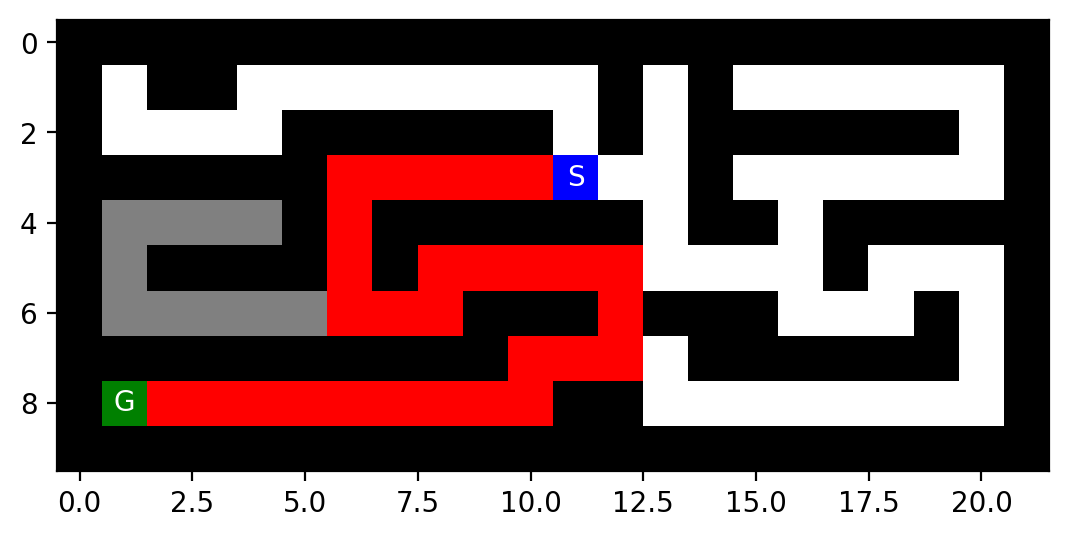

In [338]:
mh.show_maze(GBFS(small_maze))

Solution Found in 156 steps. Solution cost is 152
path cost: 152 | Nodes expanded: 316 | Max tree depth 152
max nodes in memory: 171 | Max frontier size: 8


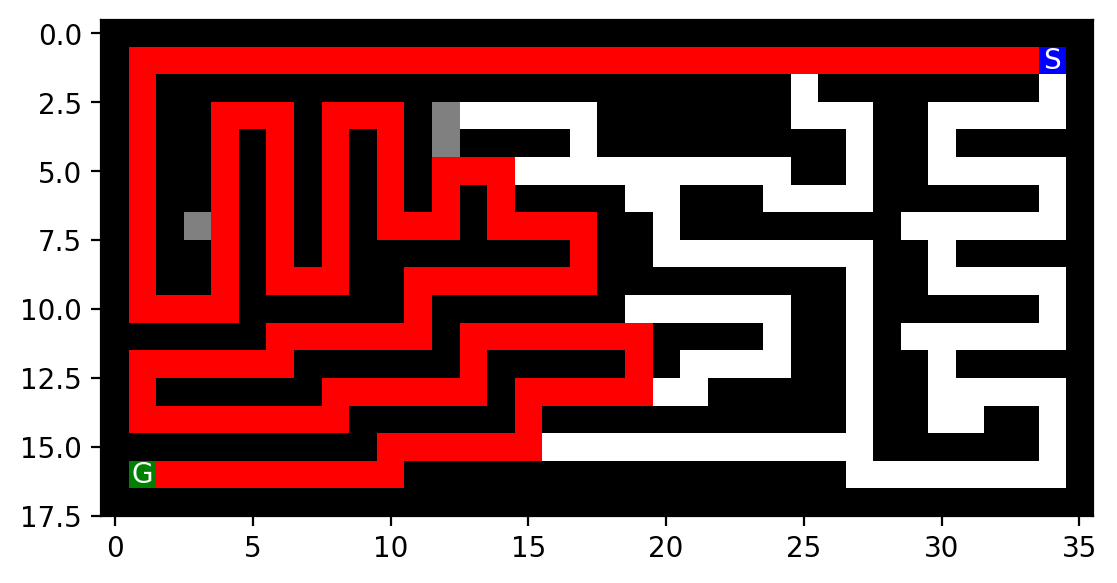

In [339]:
mh.show_maze(GBFS(medium_maze))

Solution Found in 462 steps. Solution cost is 210
path cost: 210 | Nodes expanded: 943 | Max tree depth 210
max nodes in memory: 507 | Max frontier size: 23


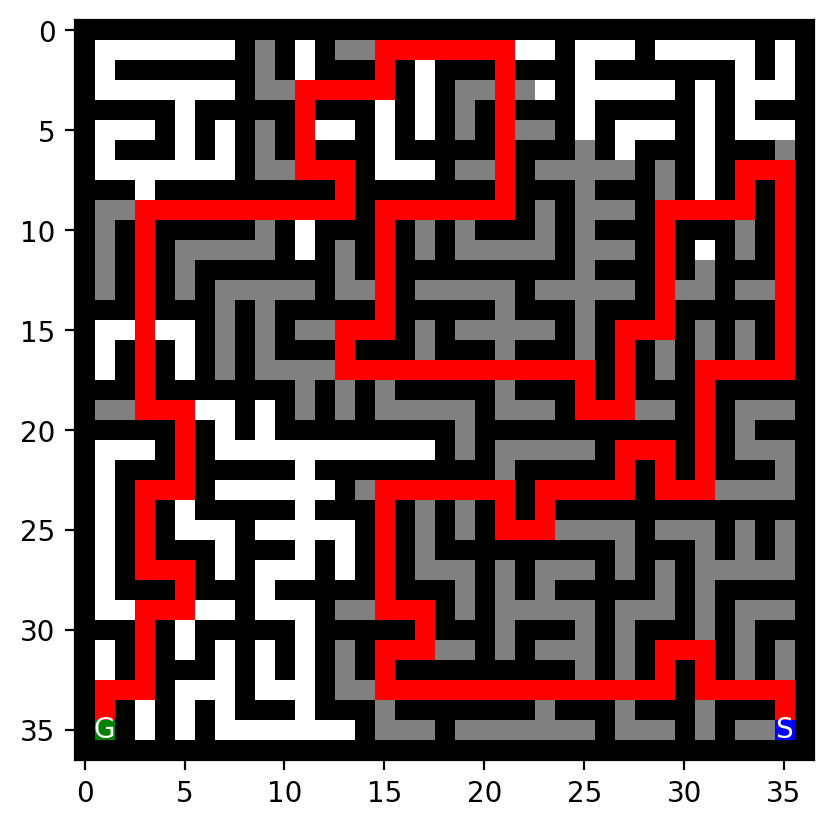

In [340]:
mh.show_maze(GBFS(large_maze))

Solution Found in 105 steps. Solution cost is 68
path cost: 68 | Nodes expanded: 385 | Max tree depth 68
max nodes in memory: 272 | Max frontier size: 84


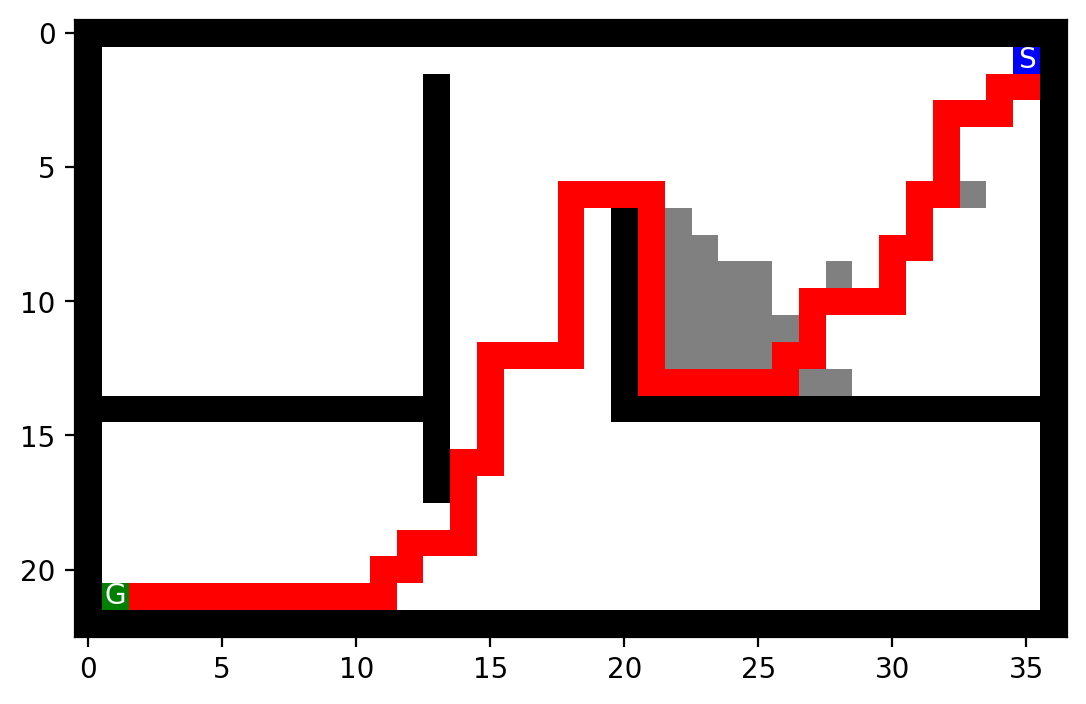

In [341]:
mh.show_maze(GBFS(open_maze))

Solution Found in 53 steps. Solution cost is 23
path cost: 23 | Nodes expanded: 141 | Max tree depth 23
max nodes in memory: 70 | Max frontier size: 9


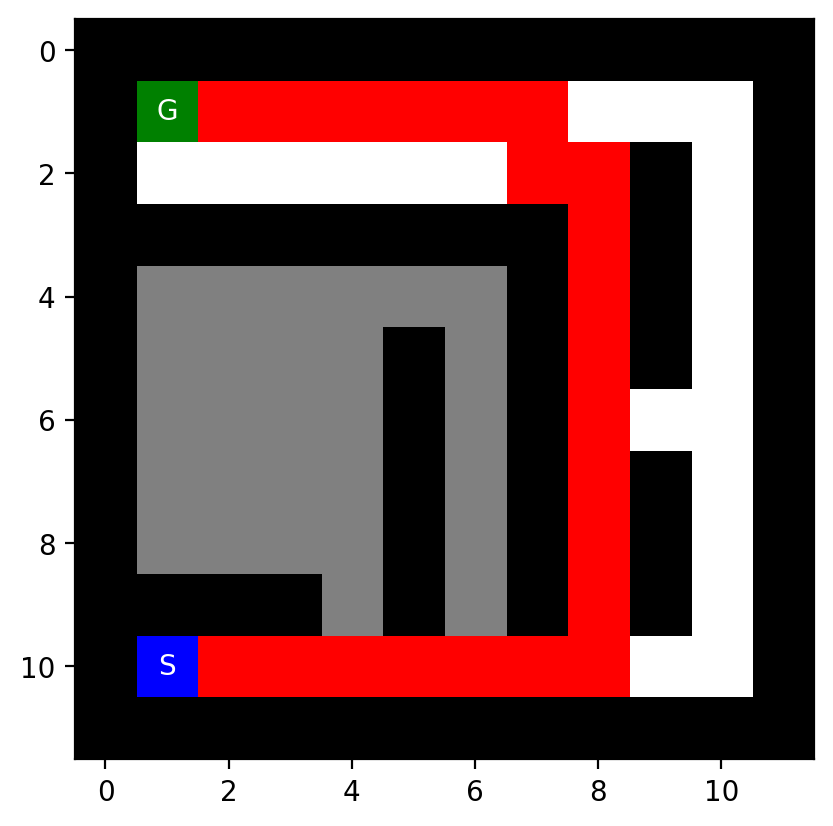

In [342]:
mh.show_maze(GBFS(loops_maze))

Solution Found in 23 steps. Solution cost is 16
path cost: 16 | Nodes expanded: 79 | Max tree depth 16
max nodes in memory: 72 | Max frontier size: 25


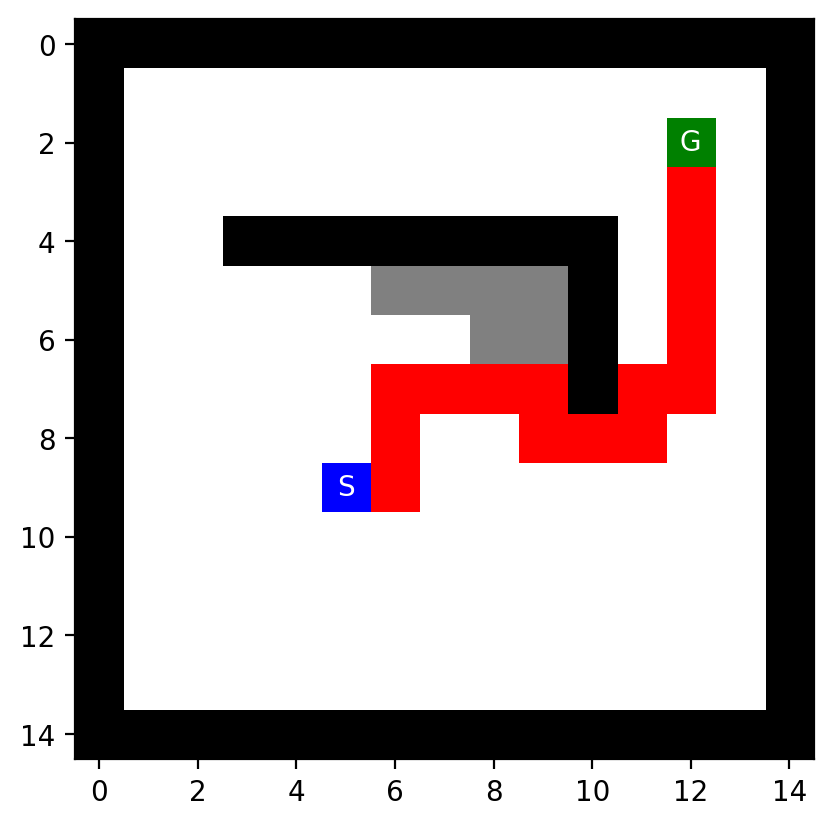

In [343]:
mh.show_maze(GBFS(L_maze))

Solution Found in 15 steps. Solution cost is 14
path cost: 14 | Nodes expanded: 56 | Max tree depth 14
max nodes in memory: 62 | Max frontier size: 24


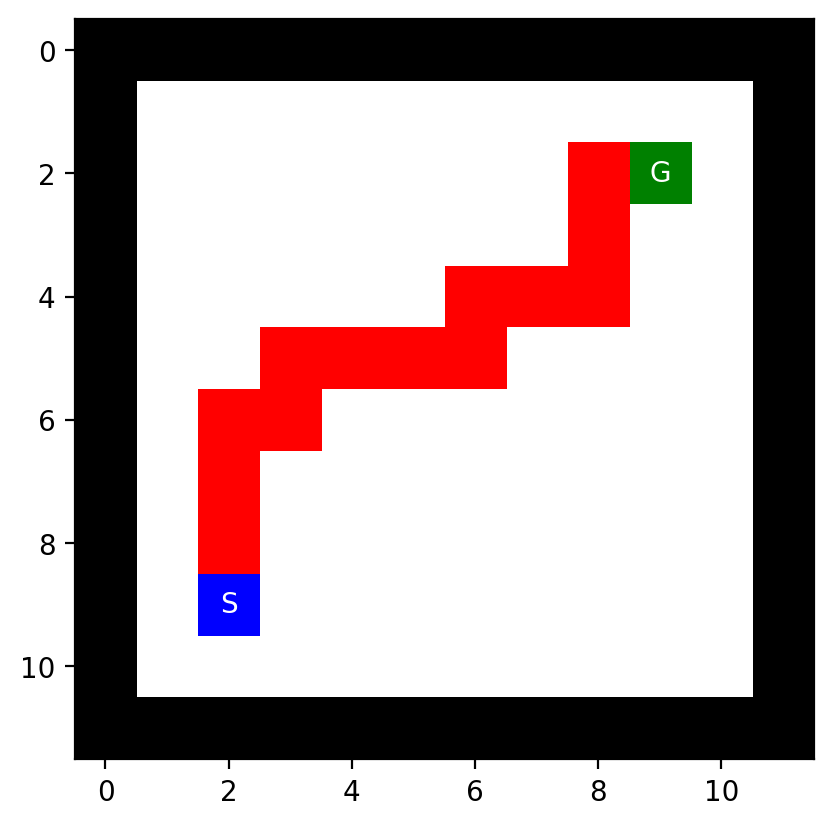

In [344]:
mh.show_maze(GBFS(empty_maze))

Solution Found in 15 steps. Solution cost is 14
path cost: 14 | Nodes expanded: 56 | Max tree depth 14
max nodes in memory: 56 | Max frontier size: 21


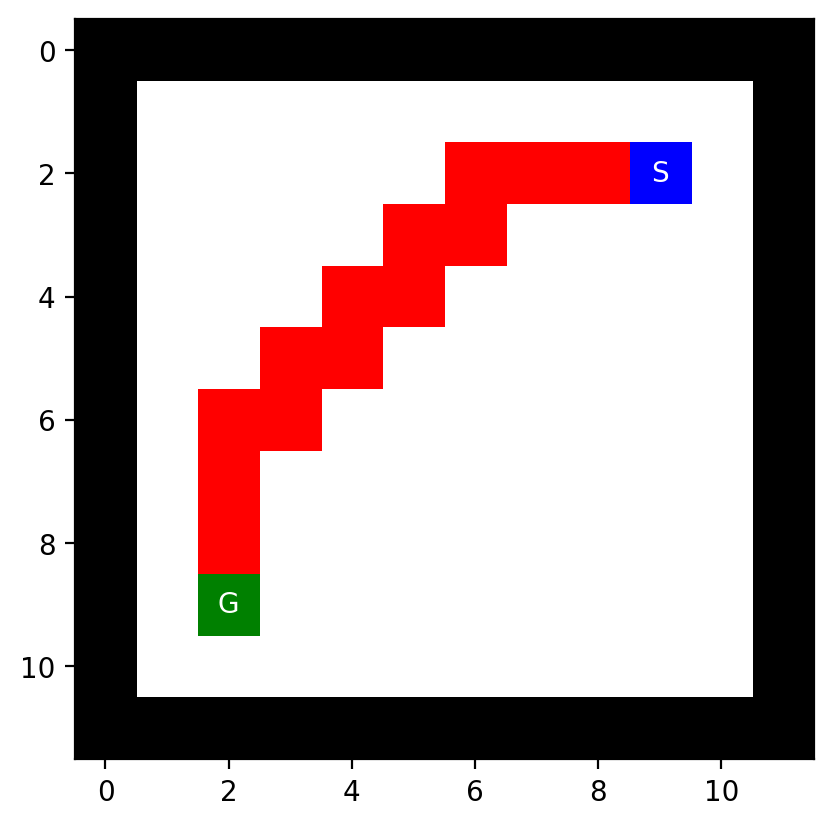

In [345]:
mh.show_maze(GBFS(empty_maze2))

In [346]:
def AStar_heuristic(node, goal):
    #print(node, " at cost: ",node.cost, " h: ", abs(node.pos[0] - goal[0]) + abs(node.pos[1] - goal[1]))
    return abs(node.pos[0] - goal[0]) + abs(node.pos[1] - goal[1]) + node.cost

In [347]:
# A* Search Algorithm
def AStar(maze):
    maze_copy = maze.copy()
    search_tree = searchTree(maze)
    final = mh.find_pos(maze,"G") # is just the coords
    start = Node(mh.find_pos(maze,"S"), None,None,0)
    frontier = []
    reached = [start]
    heapq.heappush(frontier, (AStar_heuristic(start,final), start)) # should be correct?

    nodes_expanded = 0
    memory_used = 0
    max_depth = 0
    max_frontier = 0
    num_steps = 0
    while True:
      num_steps += 1
      if search_tree.frontier_is_empty() or num_steps == 100000:
        print(f"No Solution Found after {num_steps} steps")
        return maze_copy

      if len(frontier) > max_frontier: max_frontier = len(frontier)
      if len(frontier)+len(reached) > memory_used: memory_used = len(frontier) + len(reached)
        # pop node from frontier stack, add to visited
      selected_node = frontier.pop(0)[1] # should be

      # checks for goal state
      if mh.look(maze,selected_node.pos) == "G":
                print(f"Solution Found in {num_steps} steps. Solution cost is {selected_node.cost}")
                print(f"path cost: {selected_node.cost} | Nodes expanded: {nodes_expanded} | Max tree depth {max_depth}")
                print(f"max nodes in memory: {memory_used} | Max frontier size: {max_frontier}")
                for path in selected_node.parent.get_path_from_root():
                    if mh.look(maze_copy,path.pos) =="." : maze_copy[path.pos] = "P"
                return maze_copy
        # visits the tile
      if maze_copy[selected_node.pos] == ' ': maze_copy[selected_node.pos] = '.'

      # extend the node
      new_nodes = search_tree.expand(selected_node,maze)
      # add the extended nodes in the frontier
      if len(new_nodes) > 0:
        for new_node in new_nodes:
            nodes_expanded+=1
            if new_node.cost > max_depth: max_depth = new_node.cost
            # sees if the node has not been reached or if its a cheaper alternative
            # If not in frontier, the next() function returns node with high cost so new node is added
            prev_frontier = next((x for x in frontier if x[1] == new_node), None)
            if prev_frontier is not None:
                if new_node not in reached or new_node.cost < prev_frontier[1].cost:
                 reached.append(new_node) # may have to change, does not replace old value
                 heapq.heappush(frontier, (AStar_heuristic(new_node,final), new_node))


            else:
                if new_node not in reached :
                    reached.append(new_node) # may have to change
                    heapq.heappush(frontier, (AStar_heuristic(new_node,final), new_node))

Solution Found in 36 steps. Solution cost is 19
path cost: 19 | Nodes expanded: 76 | Max tree depth 19
max nodes in memory: 51 | Max frontier size: 8


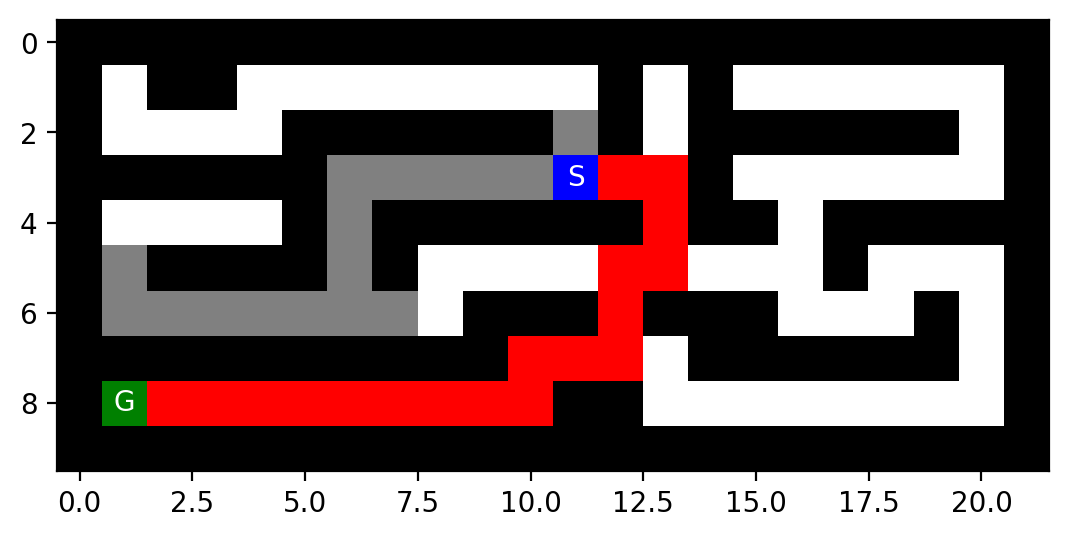

In [348]:
mh.show_maze(AStar(small_maze))

Solution Found in 220 steps. Solution cost is 68
path cost: 68 | Nodes expanded: 449 | Max tree depth 68
max nodes in memory: 233 | Max frontier size: 8


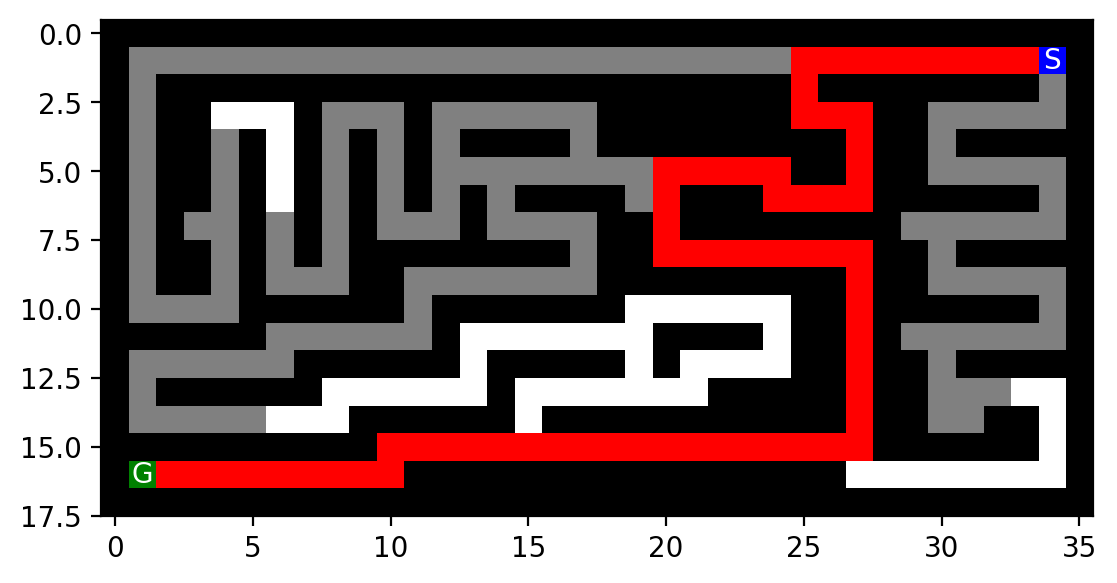

In [349]:
mh.show_maze(AStar(medium_maze))

Solution Found in 547 steps. Solution cost is 210
path cost: 210 | Nodes expanded: 1098 | Max tree depth 210
max nodes in memory: 562 | Max frontier size: 13


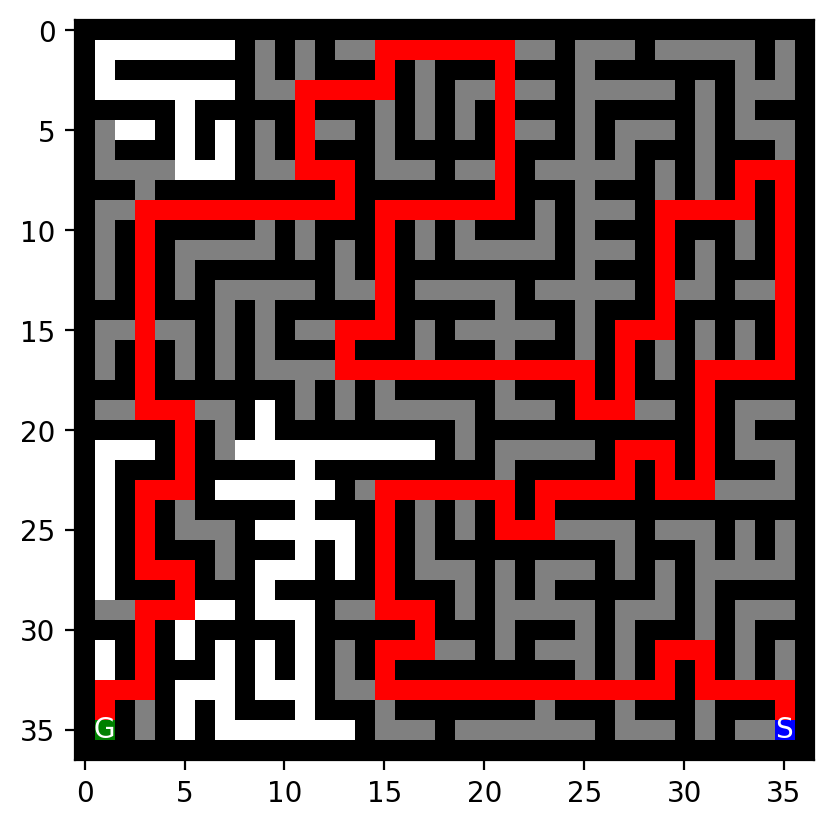

In [350]:
mh.show_maze(AStar(large_maze))

Solution Found in 257 steps. Solution cost is 54
path cost: 54 | Nodes expanded: 922 | Max tree depth 54
max nodes in memory: 498 | Max frontier size: 121


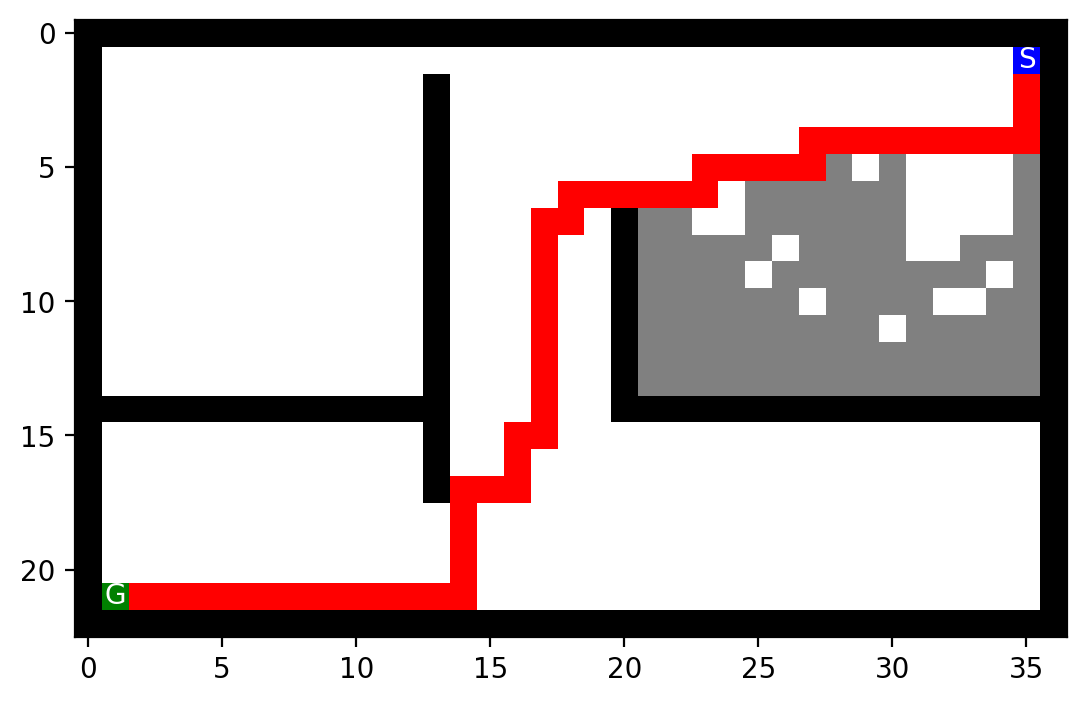

In [351]:
mh.show_maze(AStar(open_maze))

Solution Found in 65 steps. Solution cost is 23
path cost: 23 | Nodes expanded: 177 | Max tree depth 23
max nodes in memory: 84 | Max frontier size: 11


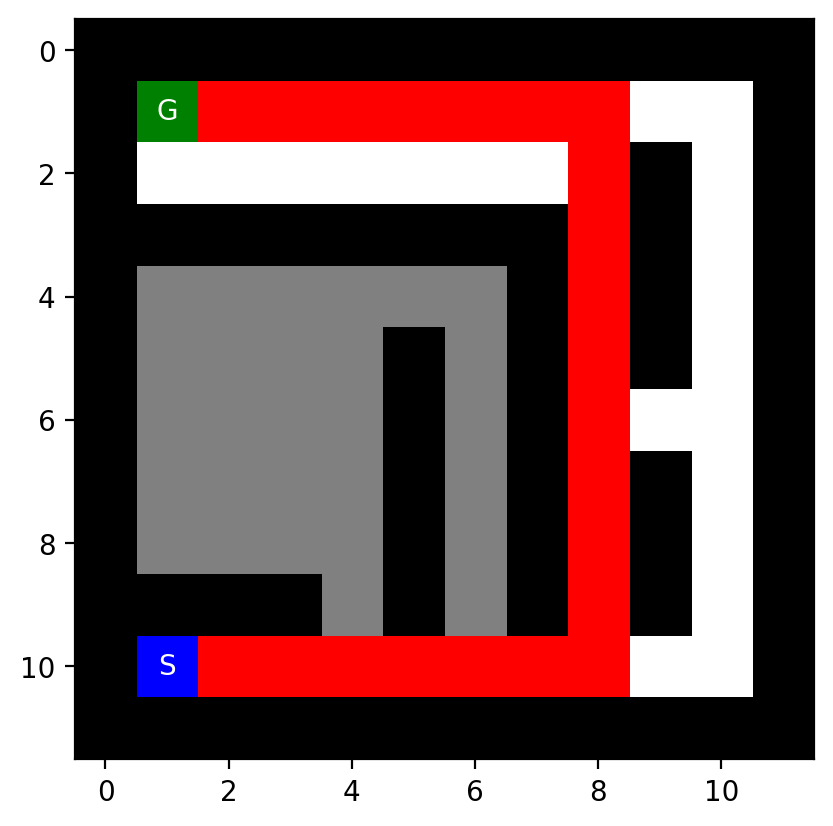

In [352]:
mh.show_maze(AStar(loops_maze))

Solution Found in 21 steps. Solution cost is 14
path cost: 14 | Nodes expanded: 74 | Max tree depth 14
max nodes in memory: 78 | Max frontier size: 29


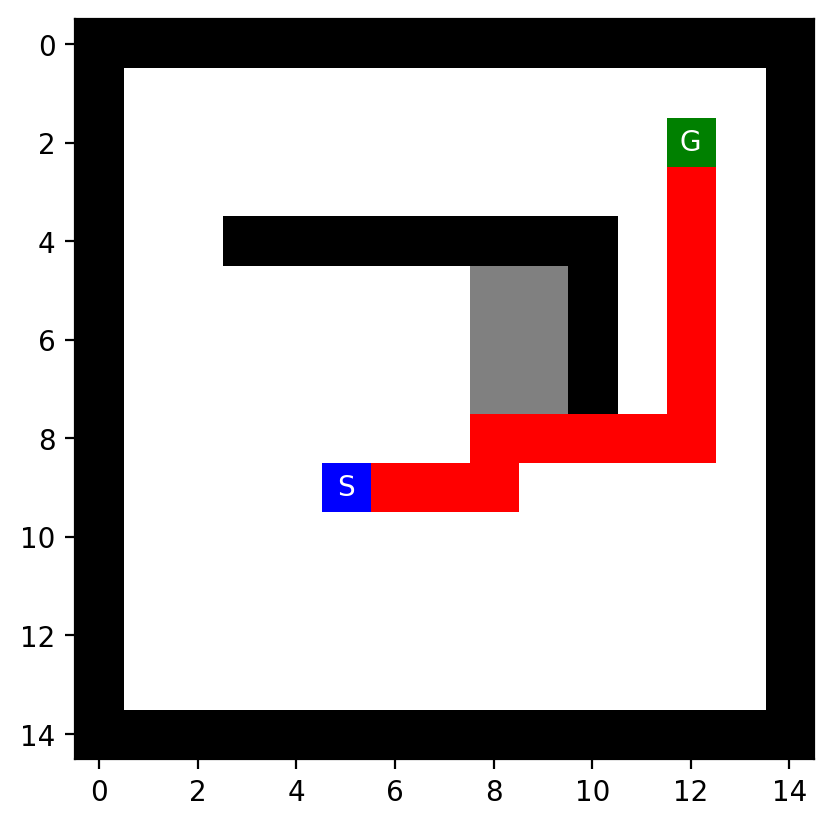

In [353]:
mh.show_maze(AStar(L_maze))

Solution Found in 15 steps. Solution cost is 14
path cost: 14 | Nodes expanded: 56 | Max tree depth 14
max nodes in memory: 68 | Max frontier size: 27


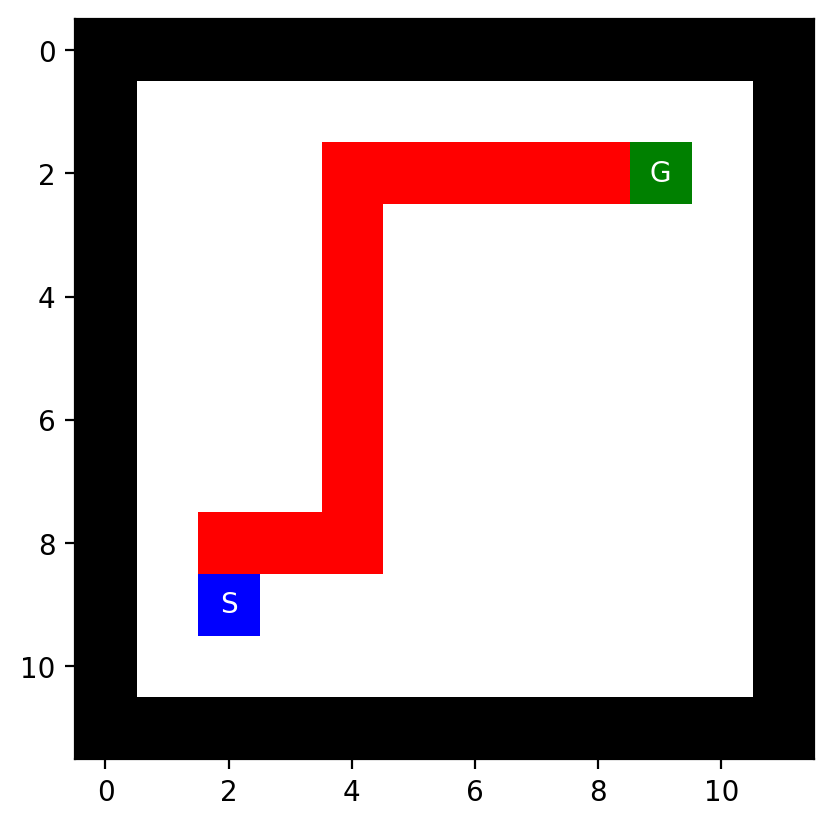

In [354]:
mh.show_maze(AStar(empty_maze))

Solution Found in 15 steps. Solution cost is 14
path cost: 14 | Nodes expanded: 56 | Max tree depth 14
max nodes in memory: 62 | Max frontier size: 24


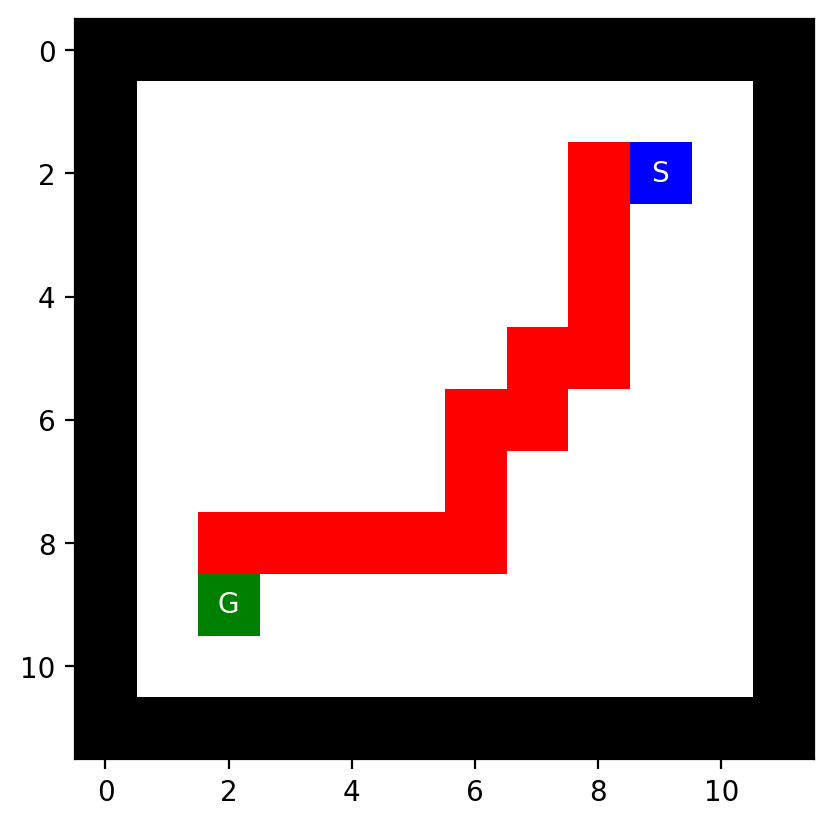

In [355]:
mh.show_maze(AStar(empty_maze2))

Are your implementations complete and optimal? What is the time and space complexity?

# Discussion
### GBFS
My algorithm is complete, but it is not optimal. This is because it continues following the same path even when it becomes more cost-effective to instead chose a different path.
The time complexity is $O(b^m)$ in the worst case, but the mazes given makes the algorithm run closer to the best case: $O(b*m)$
The Space complexity is similar to the time.
<br>
### A* Search
My implementation is both complete and optimal. It runs similarly to GBFS, however when the cost of the current path outweighs another possible solution, the algorithm will expand the latter instead.
The time complexity is the *number of nodes for which the estimated cost to the solution is less than the cost of the optimal solution*. In this way, it expands to all nodes on the possibly most efficient path to guarentee optimality.
Because it expands into all of these nodes, the space complexity is the same.


## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.


__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 19        | 183                 | 19             | 92                       | 8                 |
| DFS       | 19        | 109                 | 39             | 36                       | 35                |
| GBS       | 29        | 81                  | 29             | 49                       | 5                 |
| A*        | 19        | 76                  | 19             | 51                       | 8                 |

__Medium Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 67        | 545                 | 68             | 270                      | 9                 |
| DFS       | 74        | 3228                | 240            | 138                      | 137               |
| GBS       | 152       | 316                 | 152            | 171                      | 8                 |
| A*        | 68        | 449                 | 68             | 233                      | 8                 |

__Large Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 210       | 1239                | 210            | 623                      | 8                 |
| DFS       | 210       | 998                 | 223            | 130                      | 129               |
| GBS       | 210       | 943                 | 210            | 507                      | 23                |
| A*        | 210       | 1098                | 210            | 562                      | 13                |

__Open Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 54        | 2515                | 54             | 684                      | 25                |
| DFS       | NA        | 316,055             | 121            | 191                      | 190               |
| GBS       | 68        | 385                 | 68             | 272                      | 84                |
| A*        | 54        | 922                 | 54             | 498                      | 121               |

__Loops Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 23        | 180                 | 23             | 72                       | 8                 |
| DFS       | 47        | 146                 | 47             | 37                       | 36                |
| GBS       | 23        | 141                 | 23             | 70                       | 9                 |
| A*        | 23        | 177                 | 23             | 84                       | 11                |

__L Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 14        | 484                 | 14             | 143                      | 18                |
| DFS       | 60        | 6941                | 84             | 108                      | 107               |
| GBS       | 16        | 79                  | 16             | 72                       | 25                |
| A*        | 14        | 74                  | 14             | 78                       | 29                |

__Empty Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 14        | 335                 | 14             | 96                       | 12                |
| DFS       | 46        | 174                 | 46             | 65                       | 64                |
| GBS       | 14        | 56                  | 14             | 62                       | 24                |
| A*        | 14        | 56                  | 14             | 68                       | 27                |

__Empty Maze 2__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 14        | 331                 | 14             | 95                       | 12                |
| DFS       | 40        | 181                 | 45             | 74                       | 73                |
| GBS       | 14        | 56                  | 14             | 56                       | 21                |
| A*        | 14        | 56                  | 14             | 62                       | 64                |

* Note, the DFS *NA* is due to it repeatedly getting stuck in a room and being unable to complete it despite randomized expand results.

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#all the arrays will be stored in same order they appear above

small = pd.DataFrame(np.array([[19,19,29,19], [183,109,81,76], [19,39,29,19], [92,36,49,51], [8,35,5,8]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem','Max Frontier Size'])

medium = pd.DataFrame(np.array([[67,74,152,68], [545,3228,316,449], [19,39,29,19], [68,240,152,68], [270,138,171,233]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

large = pd.DataFrame(np.array([[210,210,210,210],[1239,998,943,1098],[210,223,210,210],[623,130,507,562],[8,129,23,13]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

openM = pd.DataFrame(np.array([[54,0,68,54],[2515,316,385,922],[54,121,68,54],[684,191,272,498],[25,190,84,121]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

loops = pd.DataFrame(np.array([[23,47,23,23],[180,146,141,177],[23,47,23,23],[72,37,70,84],[8,36,9,11]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

L = pd.DataFrame(np.array([[14,60,16,14],[484,6941,79,74],[14,84,16,14],[143,108,72,78],[18,107,25,29]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

empty = pd.DataFrame(np.array([[14,46,14,14],[335,174,56,56],[14,46,14,14],[96,65,62,68],[12,64,24,27]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

empty2 = pd.DataFrame(np.array([[14,40,14,14],[331,181,56,56],[14,45,14,14],[95,74,56,62],[12,73,21,64]]).T,
                   columns=['Path Cost', 'Nodes Expanded', 'Max Tree Depth', 'Max Nodes in Mem', 'Max Frontier Size'])

labels = np.array(['BFS','DFS','GBFS','A*'])
# why must there be so many graphs

# Small Maze

Text(0.5, 1.0, 'Path Costs of Small Maze')

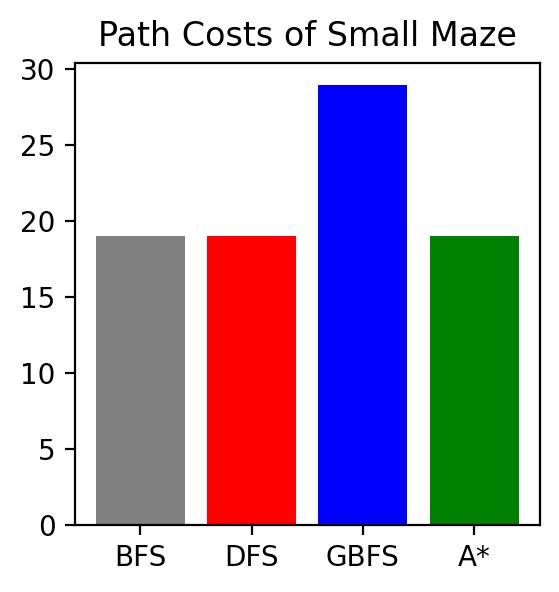

In [427]:
plt.figure(figsize=(3, 3))
plt.bar(labels, small['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Small Maze")

Text(0.5, 1.0, 'Nodes Expanded of Small Maze')

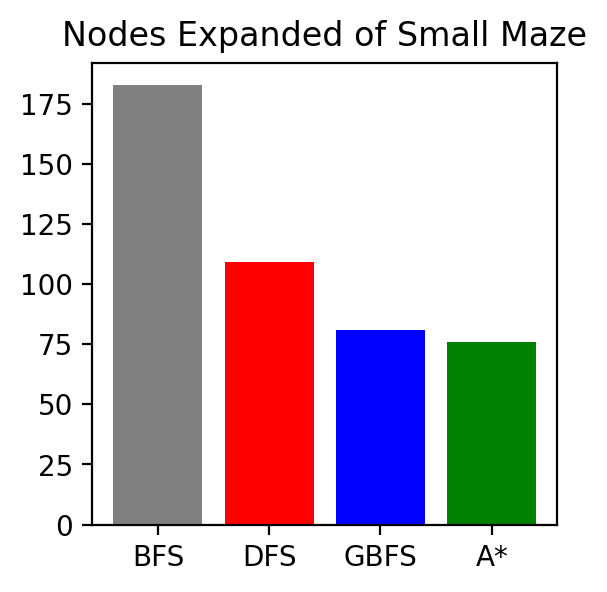

In [428]:
plt.figure(figsize=(3, 3))
plt.bar(labels, small['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded of Small Maze")

Text(0.5, 1.0, 'Max Depth of Small Maze')

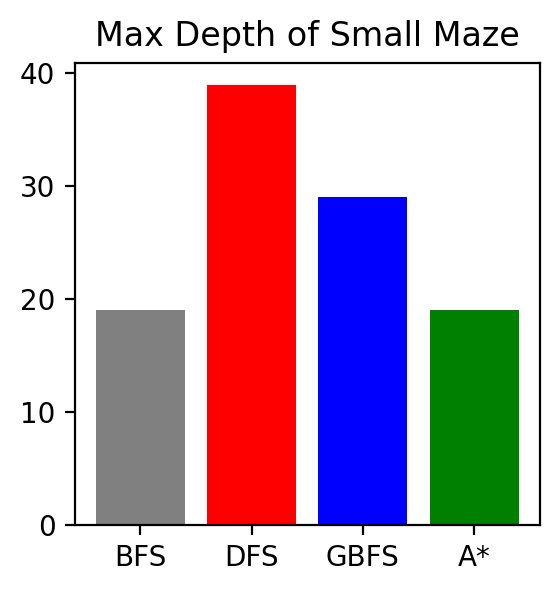

In [429]:
plt.figure(figsize=(3, 3))
plt.bar(labels, small['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of Small Maze")

Text(0.5, 1.0, 'Max Mem usage in Small Maze')

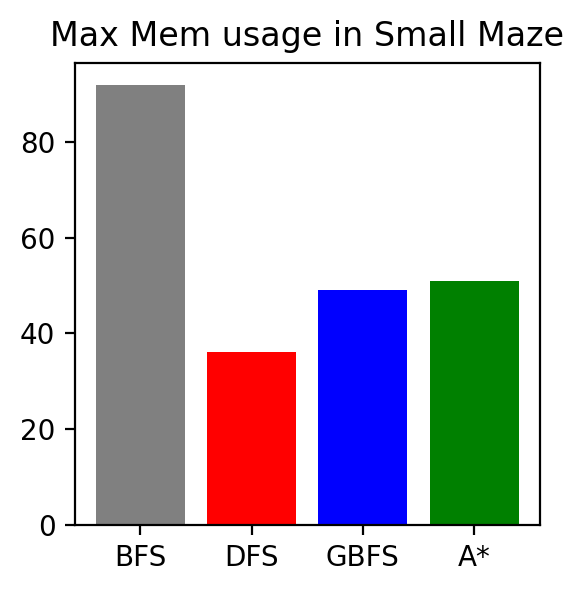

In [430]:
plt.figure(figsize=(3, 3))
plt.bar(labels, small['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Mem usage in Small Maze")

Text(0.5, 1.0, 'Max Frontier in Small Maze')

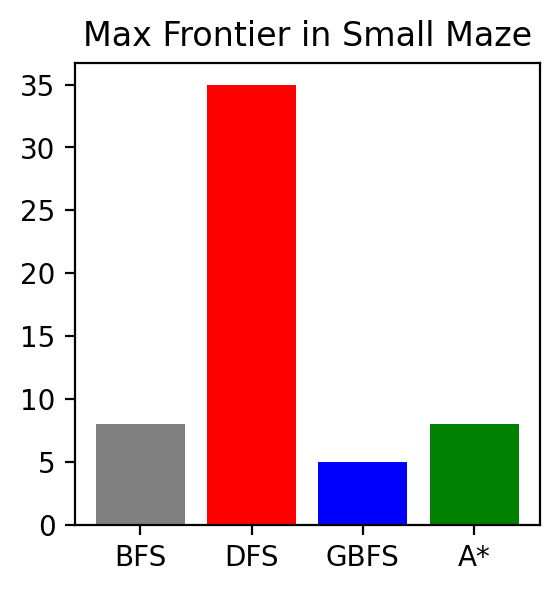

In [431]:
plt.figure(figsize=(3, 3))
plt.bar(labels, small['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier in Small Maze")

# Medium maze

Text(0.5, 1.0, 'Path Costs of Medium Maze')

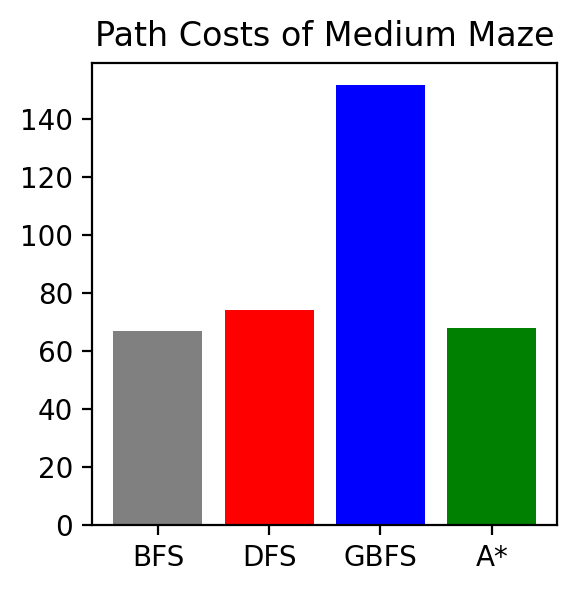

In [432]:
plt.figure(figsize=(3, 3))
plt.bar(labels, medium['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Medium Maze")

Text(0.5, 1.0, 'Nodes Expanded in Medium Maze')

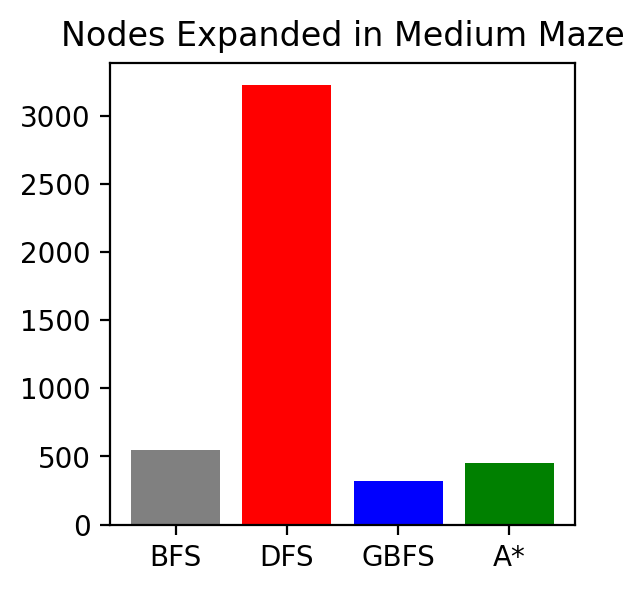

In [433]:
plt.figure(figsize=(3, 3))
plt.bar(labels, medium['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded in Medium Maze")

Text(0.5, 1.0, 'Max Depth in Medium Maze')

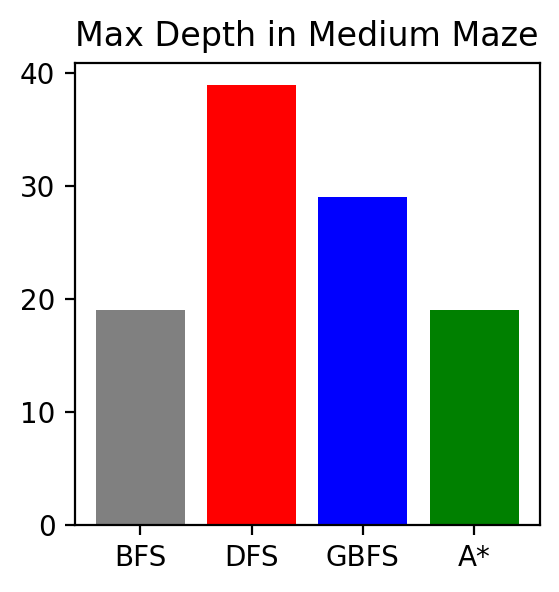

In [434]:
plt.figure(figsize=(3, 3))
plt.bar(labels, medium['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth in Medium Maze")

Text(0.5, 1.0, 'Max Nodes in Mem in Medium Maze')

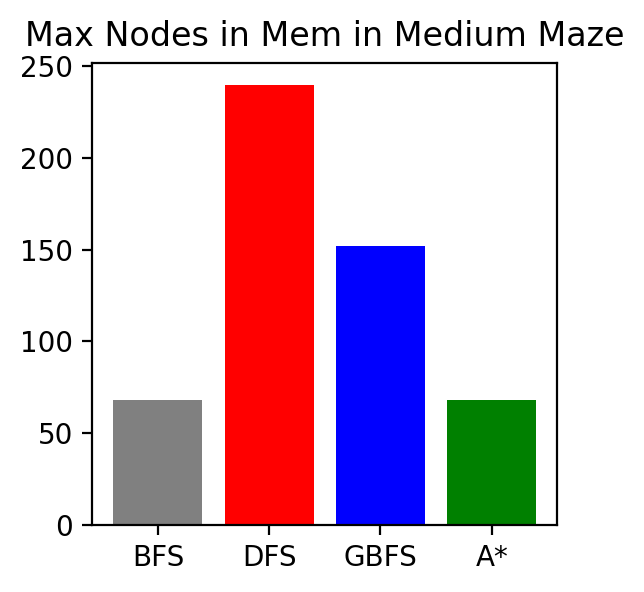

In [435]:
plt.figure(figsize=(3, 3))
plt.bar(labels, medium['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem in Medium Maze")

Text(0.5, 1.0, 'Max Frontier of Medium Maze')

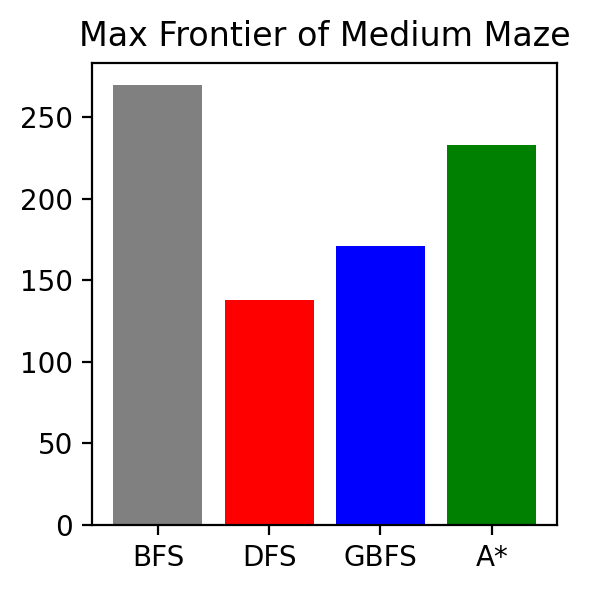

In [436]:
plt.figure(figsize=(3, 3))
plt.bar(labels, medium['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of Medium Maze")

# Large

Text(0.5, 1.0, 'Path Costs of Large Maze')

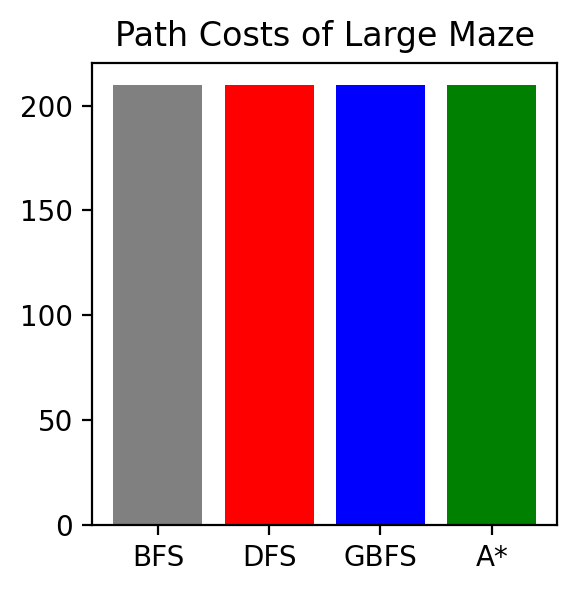

In [437]:
plt.figure(figsize=(3, 3))
plt.bar(labels, large['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Large Maze")

Text(0.5, 1.0, 'Nodes Expanded of Large Maze')

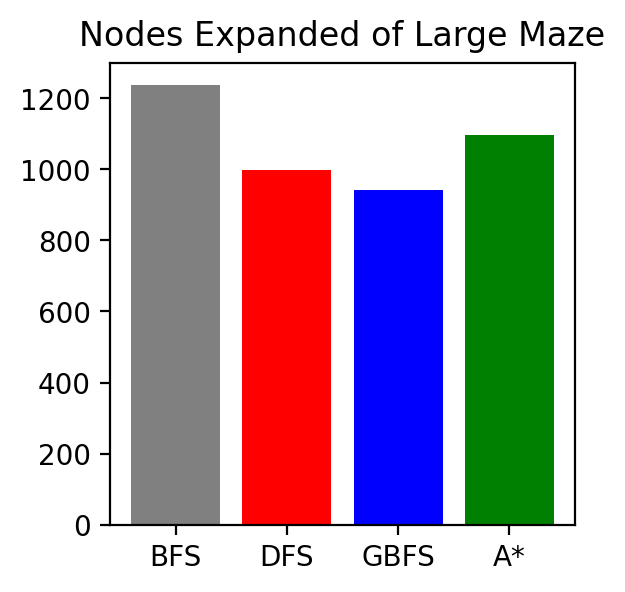

In [438]:
plt.figure(figsize=(3, 3))
plt.bar(labels, large['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded of Large Maze")

Text(0.5, 1.0, 'Max Depth of Large Maze')

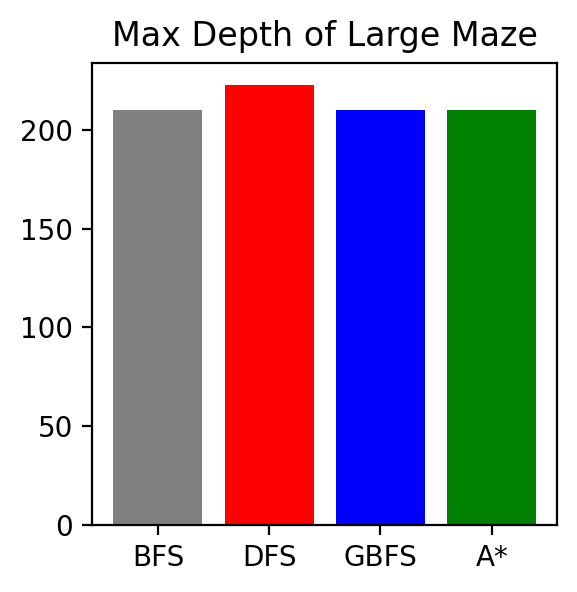

In [439]:
plt.figure(figsize=(3, 3))
plt.bar(labels, large['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of Large Maze")

Text(0.5, 1.0, 'Max Nodes in Mem of Large Maze')

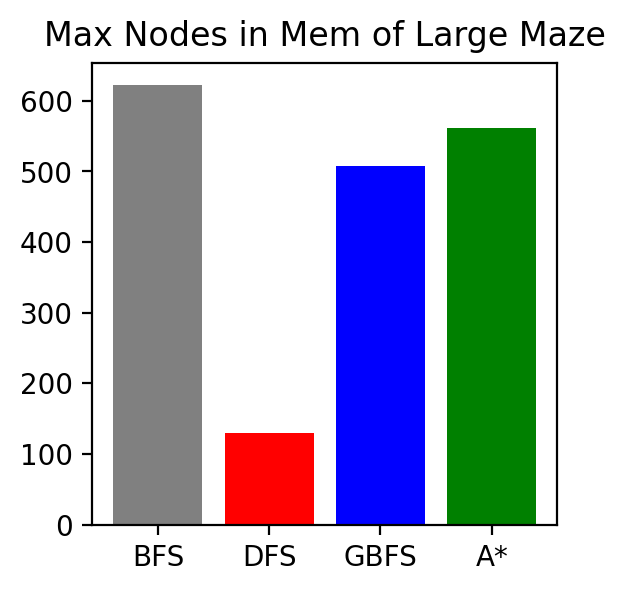

In [440]:
plt.figure(figsize=(3, 3))
plt.bar(labels, large['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem of Large Maze")

Text(0.5, 1.0, 'Max Frontier of Large Maze')

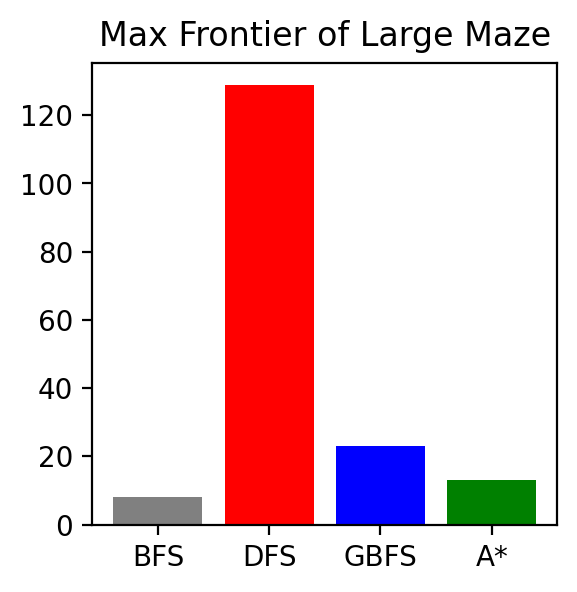

In [441]:
plt.figure(figsize=(3, 3))
plt.bar(labels, large['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of Large Maze")

# Open

Text(0.5, 1.0, 'Path Costs of Open Maze')

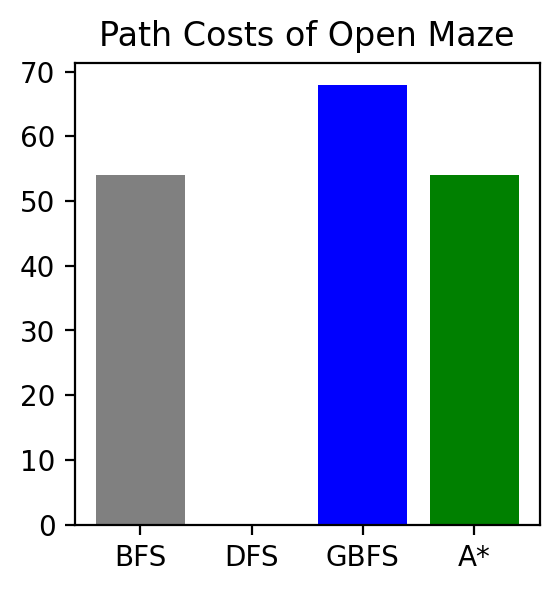

In [442]:
plt.figure(figsize=(3, 3))
plt.bar(labels, openM['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Open Maze")

Text(0.5, 1.0, 'Nodes Expanded in Open Maze')

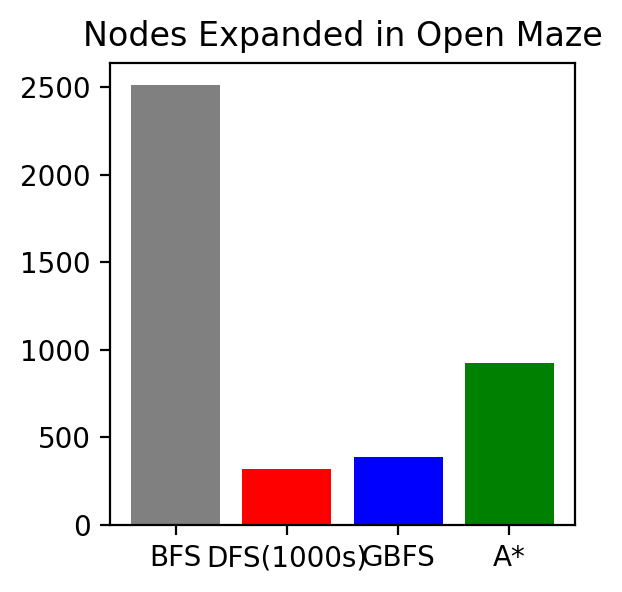

In [443]:
plt.figure(figsize=(3, 3))
plt.bar(['BFS','DFS(1000s)','GBFS','A*'], openM['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded in Open Maze")

Text(0.5, 1.0, 'Max Depth of Open Maze')

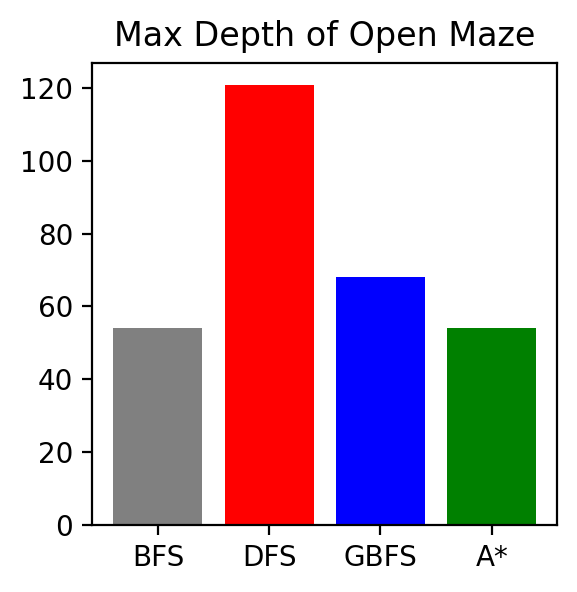

In [444]:
plt.figure(figsize=(3, 3))
plt.bar(labels, openM['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of Open Maze")

Text(0.5, 1.0, 'Max Nodes in Mem of Open Maze')

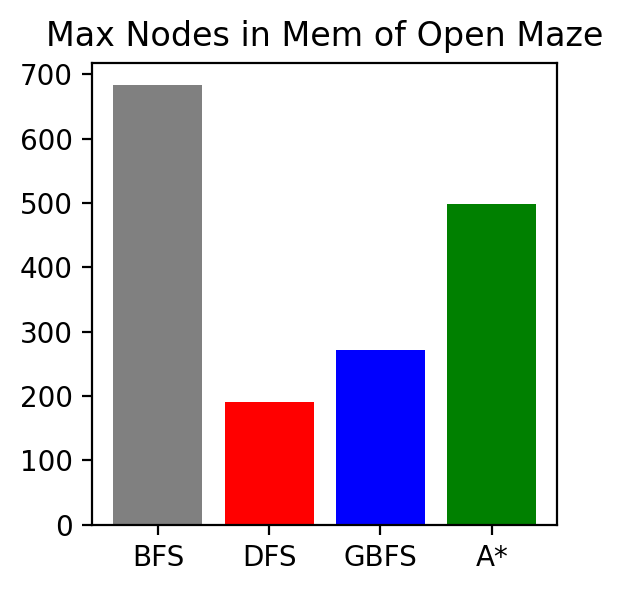

In [445]:
plt.figure(figsize=(3, 3))
plt.bar(labels, openM['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem of Open Maze")

Text(0.5, 1.0, 'Max Frontier of Open Maze')

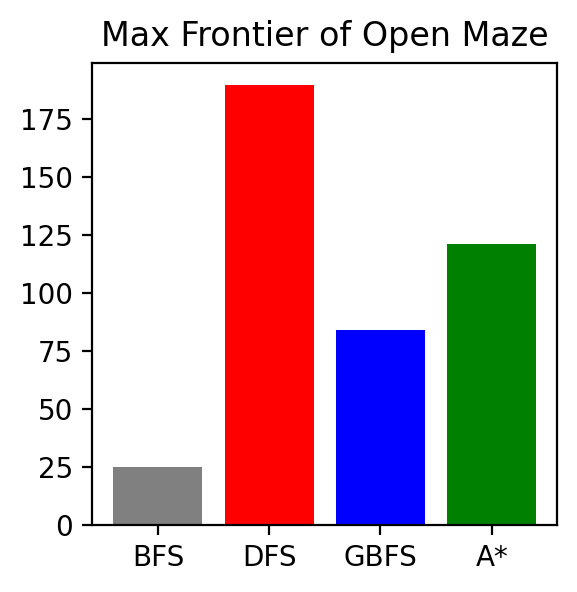

In [446]:
plt.figure(figsize=(3, 3))
plt.bar(labels, openM['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of Open Maze")

# Loops

Text(0.5, 1.0, 'Path Costs of Loops Maze')

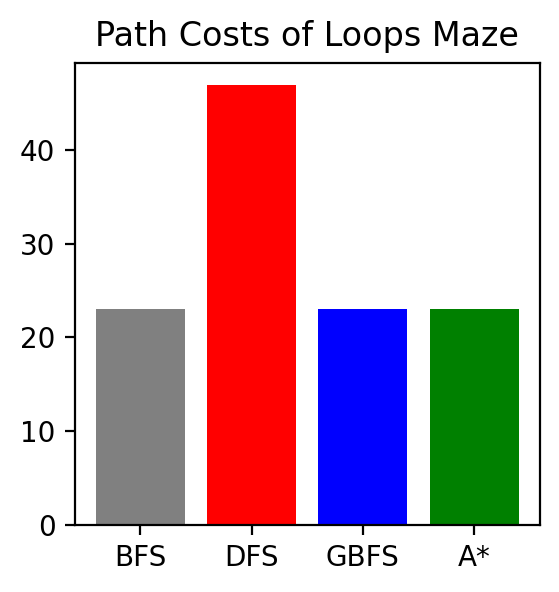

In [447]:
plt.figure(figsize=(3, 3))
plt.bar(labels, loops['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Loops Maze")

Text(0.5, 1.0, 'Nodes Expanded of Loops Maze')

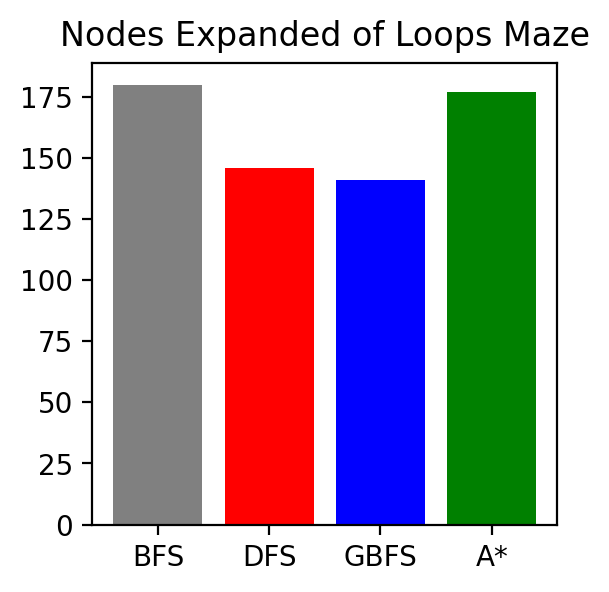

In [448]:
plt.figure(figsize=(3, 3))
plt.bar(labels, loops['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded of Loops Maze")

Text(0.5, 1.0, 'Max Depth of Loops Maze')

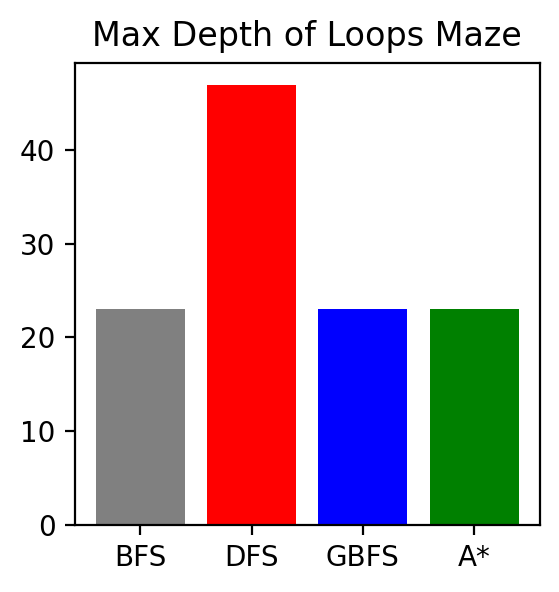

In [449]:
plt.figure(figsize=(3, 3))
plt.bar(labels, loops['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of Loops Maze")

Text(0.5, 1.0, 'Max Nodes in Mem of Loops Maze')

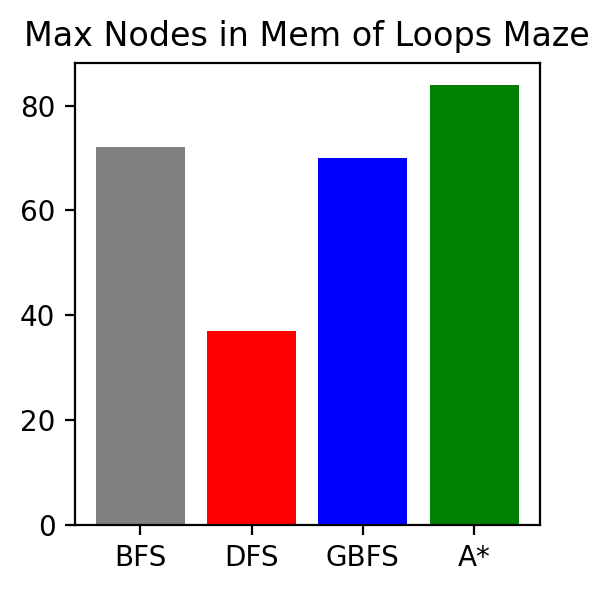

In [450]:
plt.figure(figsize=(3, 3))
plt.bar(labels, loops['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem of Loops Maze")

Text(0.5, 1.0, 'Max Frontier of Loops Maze')

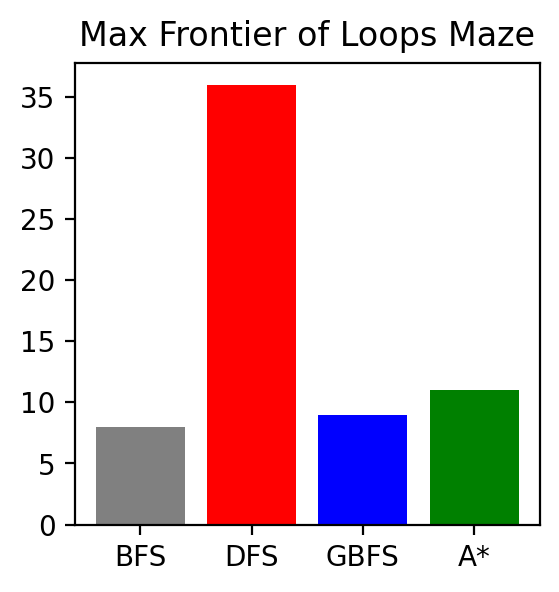

In [451]:
plt.figure(figsize=(3, 3))
plt.bar(labels, loops['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of Loops Maze")

# L maze

Text(0.5, 1.0, 'Path Costs of L Maze')

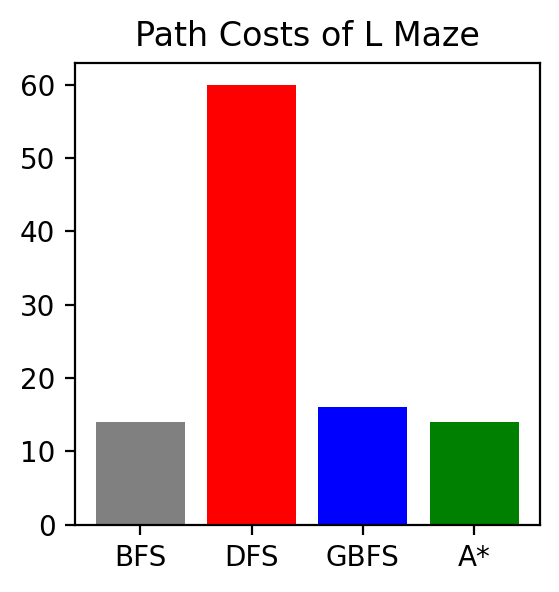

In [452]:
plt.figure(figsize=(3, 3))
plt.bar(labels, L['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of L Maze")

Text(0.5, 1.0, 'Nodes Expanded of L Maze')

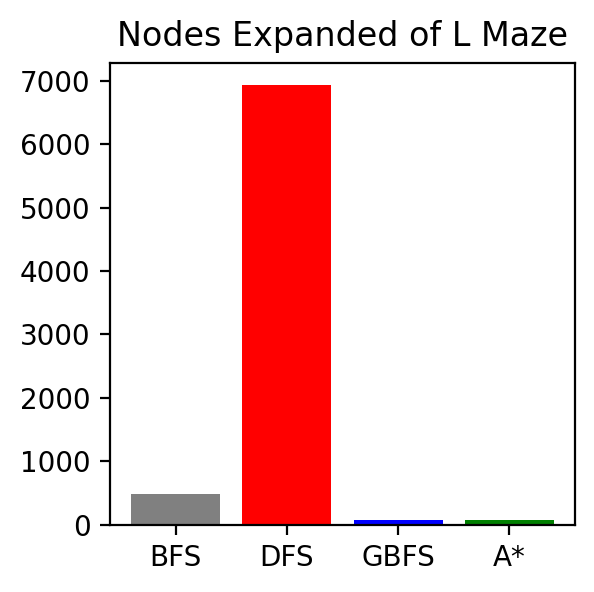

In [453]:
plt.figure(figsize=(3, 3))
plt.bar(labels, L['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded of L Maze")

Text(0.5, 1.0, 'Max Depth of L Maze')

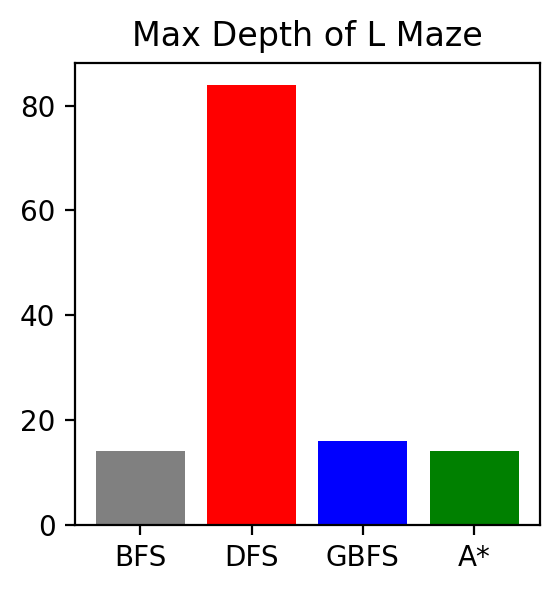

In [454]:
plt.figure(figsize=(3, 3))
plt.bar(labels, L['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of L Maze")

Text(0.5, 1.0, 'Max Nodes in Mem of L Maze')

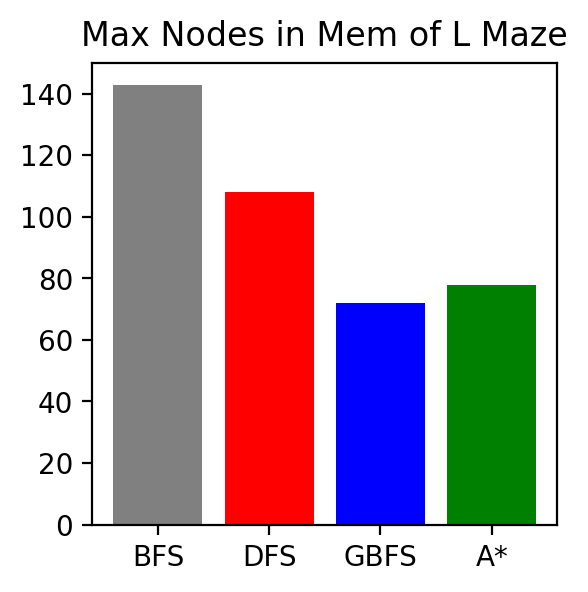

In [455]:
plt.figure(figsize=(3, 3))
plt.bar(labels, L['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem of L Maze")

Text(0.5, 1.0, 'Max Frontier of L Maze')

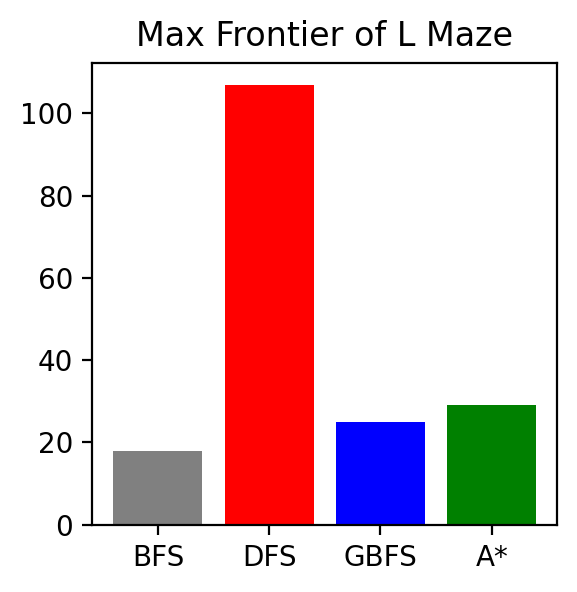

In [456]:
plt.figure(figsize=(3, 3))
plt.bar(labels, L['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of L Maze")

# Empty 1

Text(0.5, 1.0, 'Path Costs of Empty Maze')

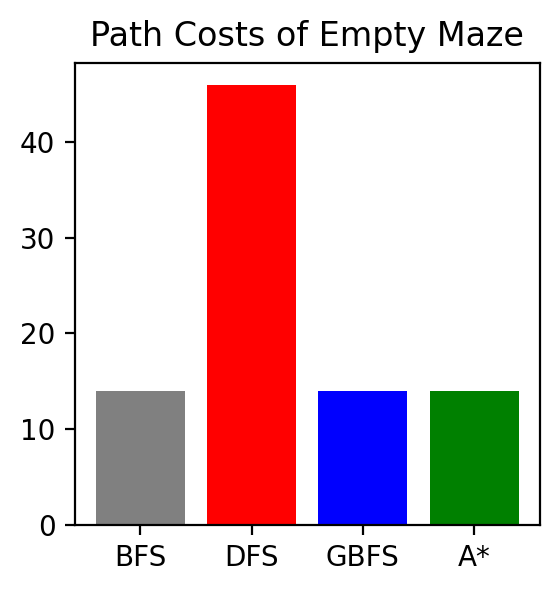

In [457]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Empty Maze")

Text(0.5, 1.0, 'Nodes Expanded of Empty Maze')

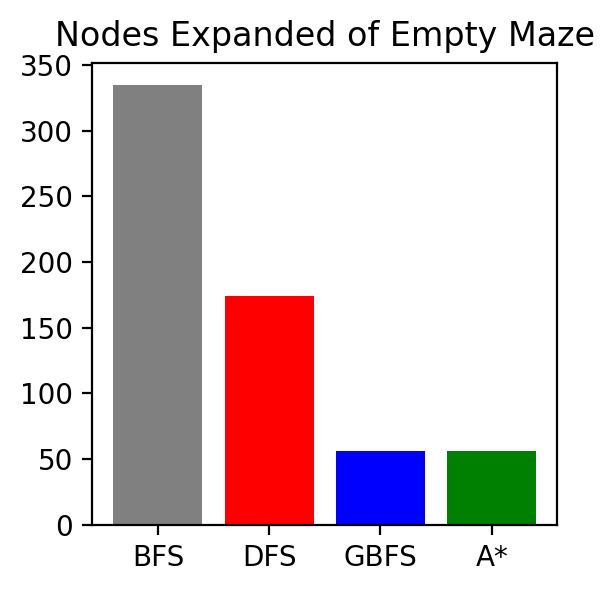

In [458]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded of Empty Maze")

Text(0.5, 1.0, 'Max Depth of Empty Maze')

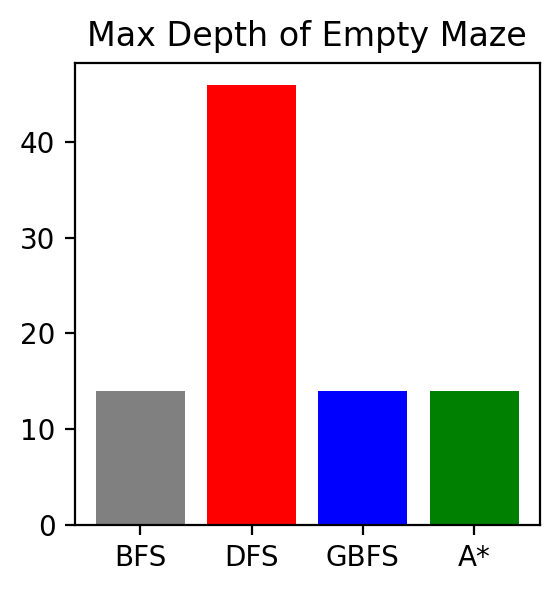

In [459]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of Empty Maze")

Text(0.5, 1.0, 'Max Nodes in Mem of Empty Maze')

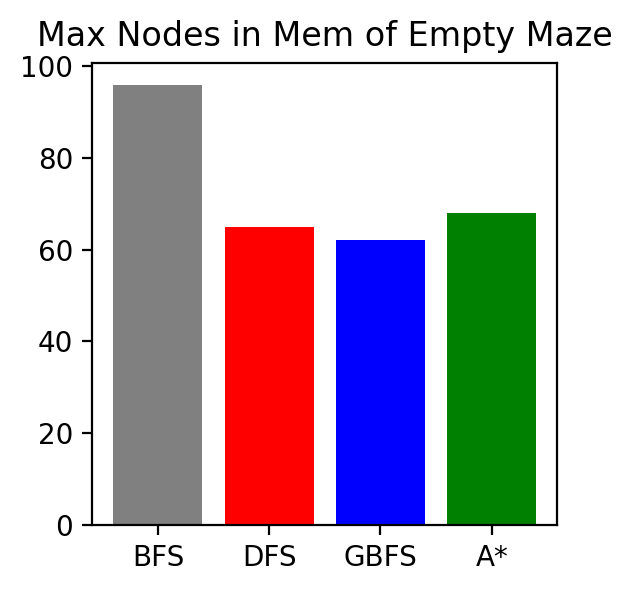

In [460]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem of Empty Maze")

Text(0.5, 1.0, 'Max Frontier of Empty Maze')

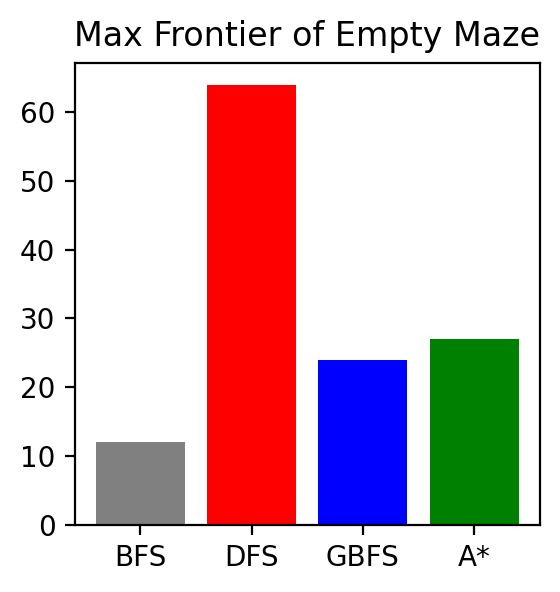

In [461]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of Empty Maze")

# Empty 2

Text(0.5, 1.0, 'Path Costs of Empty Maze ')

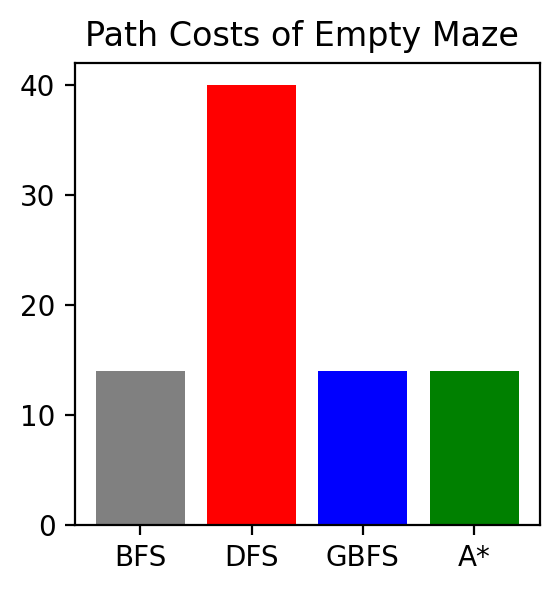

In [462]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty2['Path Cost'], color=['grey', 'red', 'blue', 'green'])
plt.title("Path Costs of Empty Maze ")

Text(0.5, 1.0, 'Nodes Expanded of Empty Maze 2')

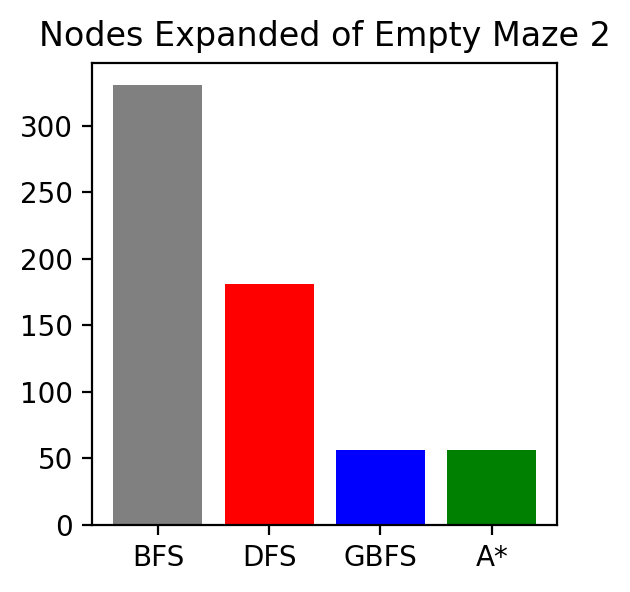

In [463]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty2['Nodes Expanded'], color=['grey', 'red', 'blue', 'green'])
plt.title("Nodes Expanded of Empty Maze 2")

Text(0.5, 1.0, 'Max Depth of Empty Maze 2')

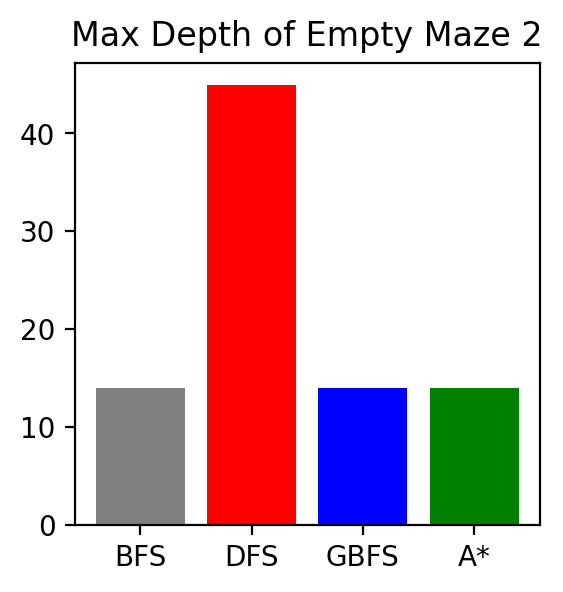

In [464]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty2['Max Tree Depth'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Depth of Empty Maze 2")

Text(0.5, 1.0, 'Max Nodes in Mem of Empty Maze 2')

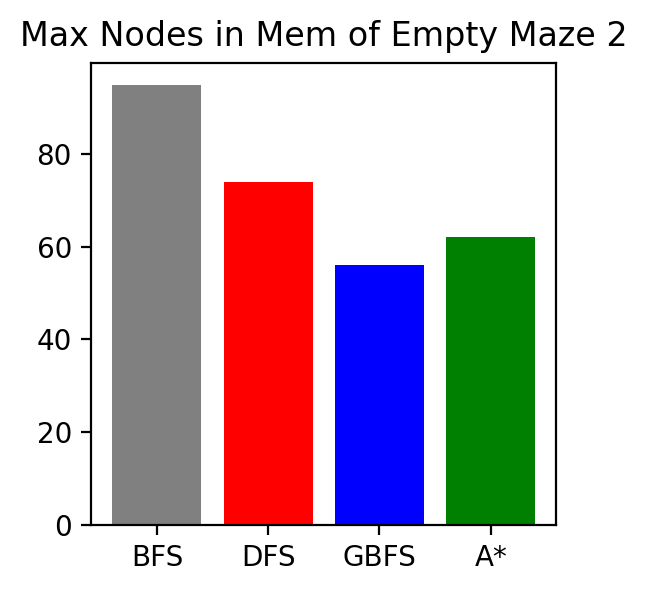

In [465]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty2['Max Nodes in Mem'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Nodes in Mem of Empty Maze 2")

Text(0.5, 1.0, 'Max Frontier of Empty Maze 2')

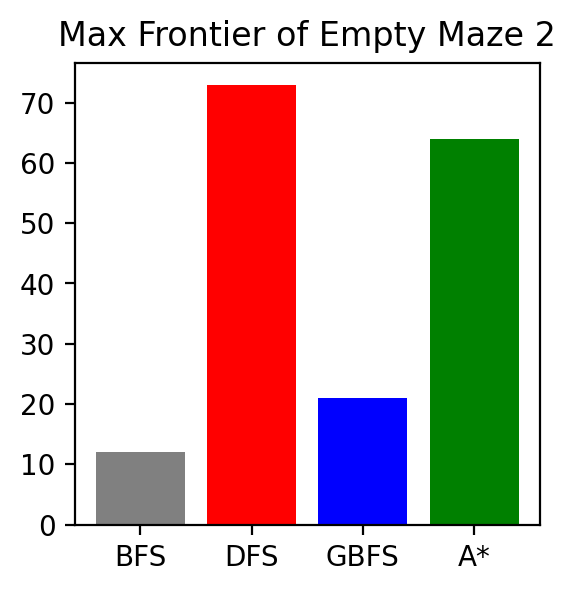

In [466]:
plt.figure(figsize=(3, 3))
plt.bar(labels, empty2['Max Frontier Size'], color=['grey', 'red', 'blue', 'green'])
plt.title("Max Frontier of Empty Maze 2")

## Discussion

Implementing these different algorithms made me appreciate the ingenuity behind so many things. It's fascinating to see how all the search algorithms are different implementations of a breadth first search.
<br>
Programing each of these by hand also proved how difficult debugging can be in AI, and especially search algorithms. Thankfully we were able to easily see how our model progressed through the maze and make adjustments as needed, but in a real-world case where the search space is millions or even more in size, this would be unfeasible.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [472]:
with open("medM1.txt", "r") as f:
    m1 = f.read()
M1 = mh.parse_maze(m1)

with open("medM2.txt", "r") as f:
    m2 = f.read()
M2 = mh.parse_maze(m2)

with open("medM3.txt", "r") as f:
    m3 = f.read()
M3 = mh.parse_maze(m3)

Solution Found in 156 steps. Solution cost is 42
path cost: 41 | Nodes expanded: 322 | Max tree depth 42
max nodes in memory: 162 | Max frontier size: 8


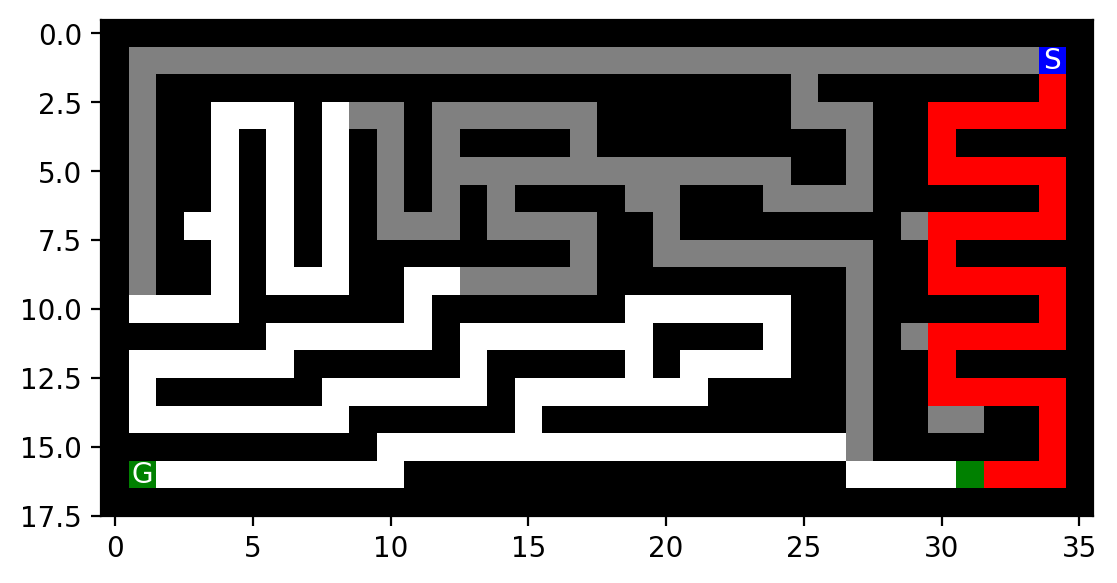

Solution Found in 158 steps. Solution cost is 43
path cost: 42 | Nodes expanded: 326 | Max tree depth 43
max nodes in memory: 164 | Max frontier size: 9


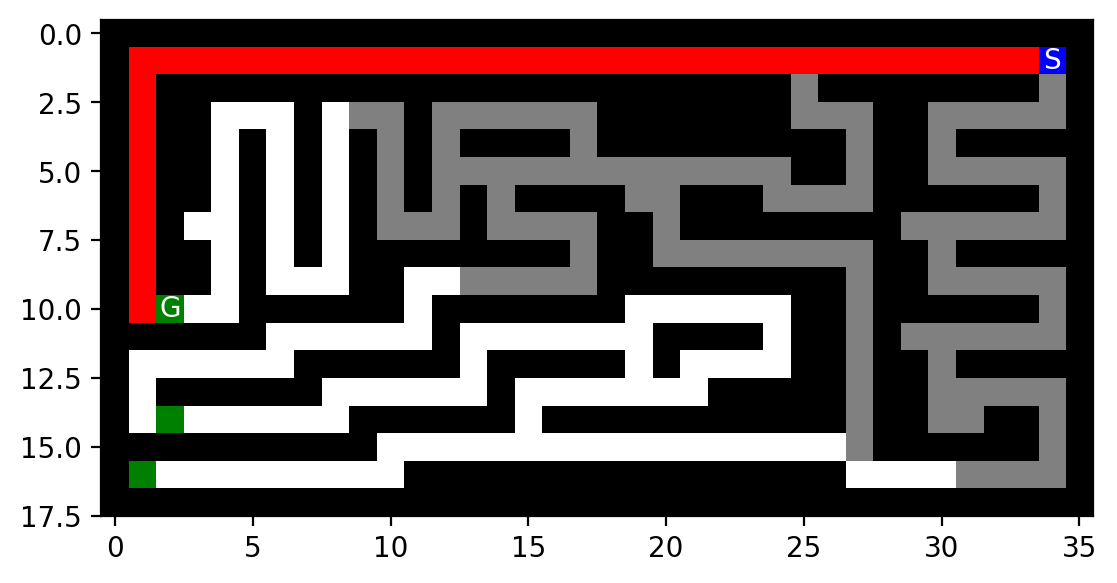

Solution Found in 153 steps. Solution cost is 42
path cost: 41 | Nodes expanded: 316 | Max tree depth 42
max nodes in memory: 158 | Max frontier size: 8


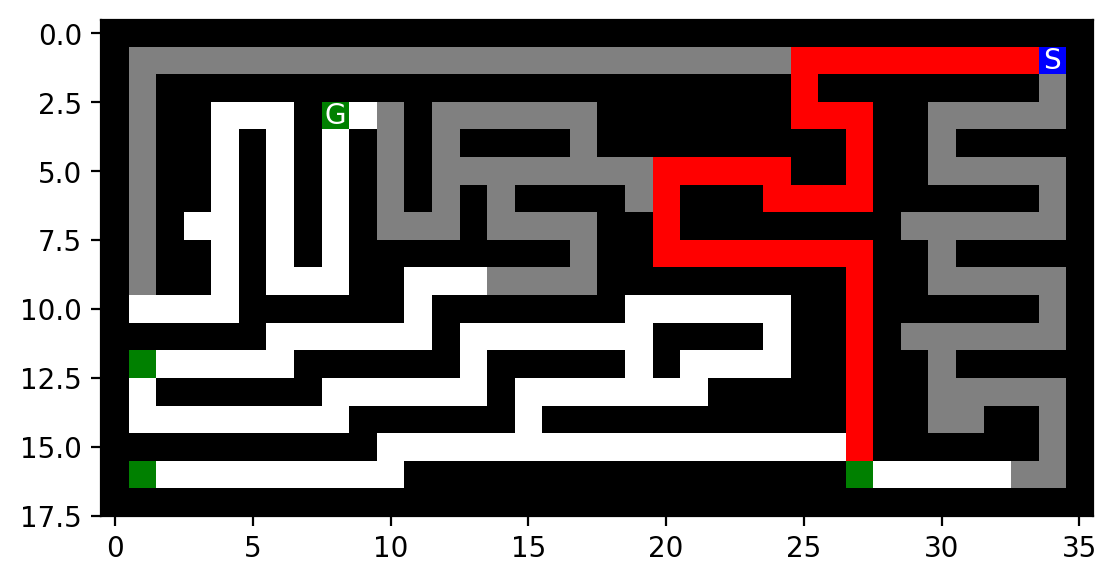

In [474]:
mh.show_maze(BFS(M1))
mh.show_maze(BFS(M2))
mh.show_maze(BFS(M3))

Solution Found in 78 steps. Solution cost is 42
path cost: 42 | Nodes expanded: 98 | Max tree depth 42
max nodes in memory: 22 | Max frontier size: 21


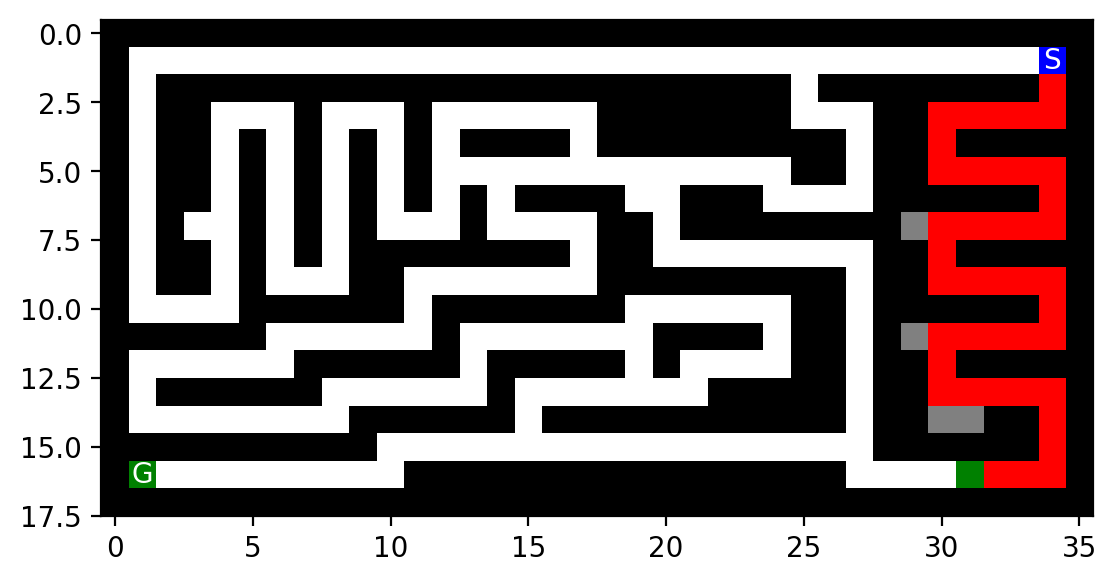

Solution Found in 190 steps. Solution cost is 113
path cost: 113 | Nodes expanded: 250 | Max tree depth 113
max nodes in memory: 62 | Max frontier size: 61


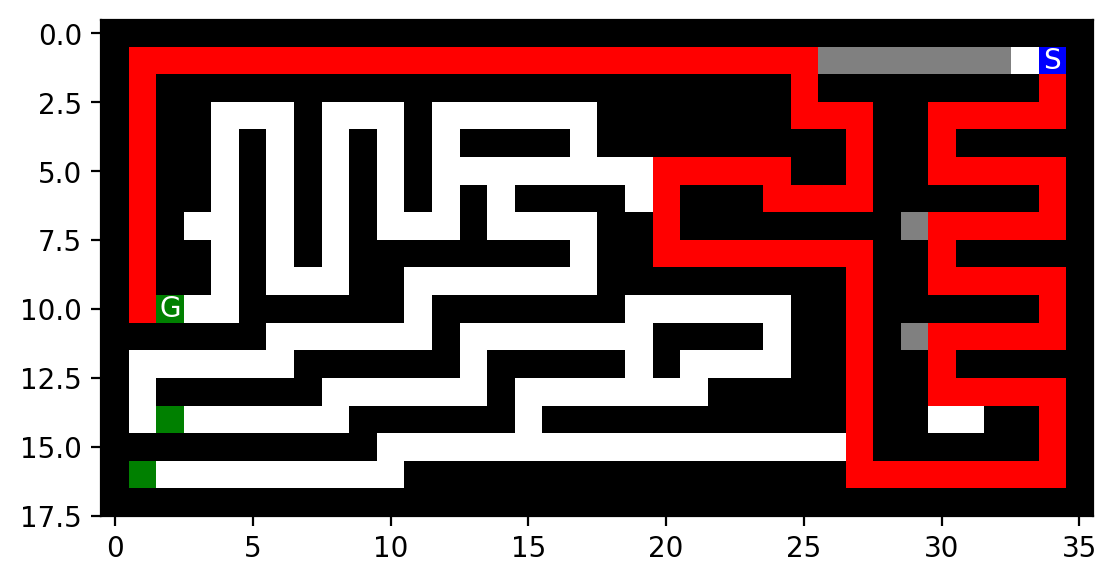

Solution Found in 102 steps. Solution cost is 68
path cost: 68 | Nodes expanded: 139 | Max tree depth 68
max nodes in memory: 40 | Max frontier size: 39


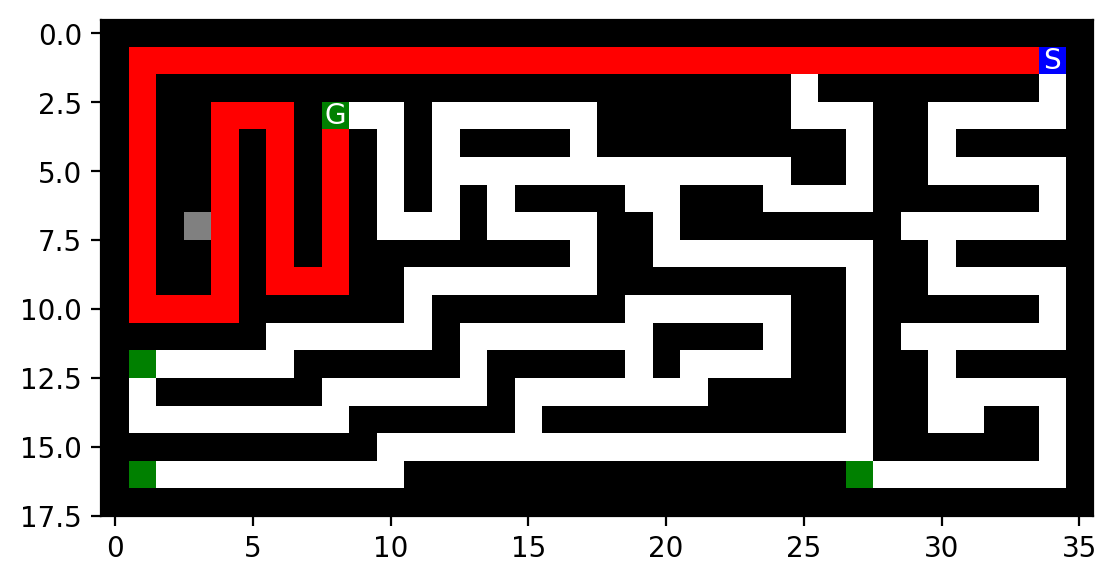

In [475]:
mh.show_maze(DFS(M1))
mh.show_maze(DFS(M2))
mh.show_maze(DFS(M3))

Solution Found in 49 steps. Solution cost is 42
path cost: 42 | Nodes expanded: 98 | Max tree depth 42
max nodes in memory: 52 | Max frontier size: 4


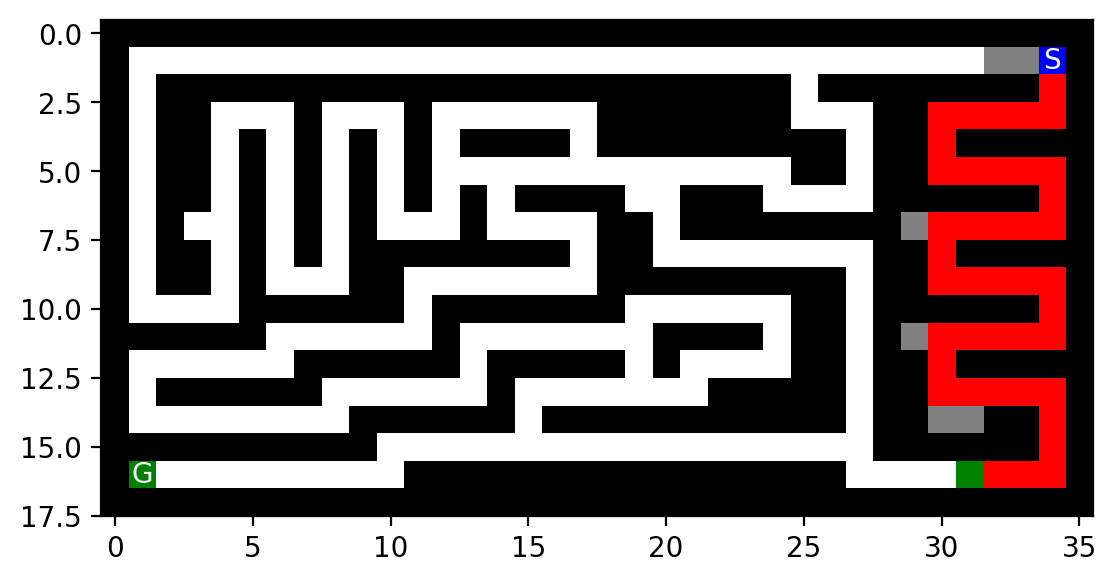

Solution Found in 44 steps. Solution cost is 43
path cost: 43 | Nodes expanded: 87 | Max tree depth 43
max nodes in memory: 49 | Max frontier size: 3


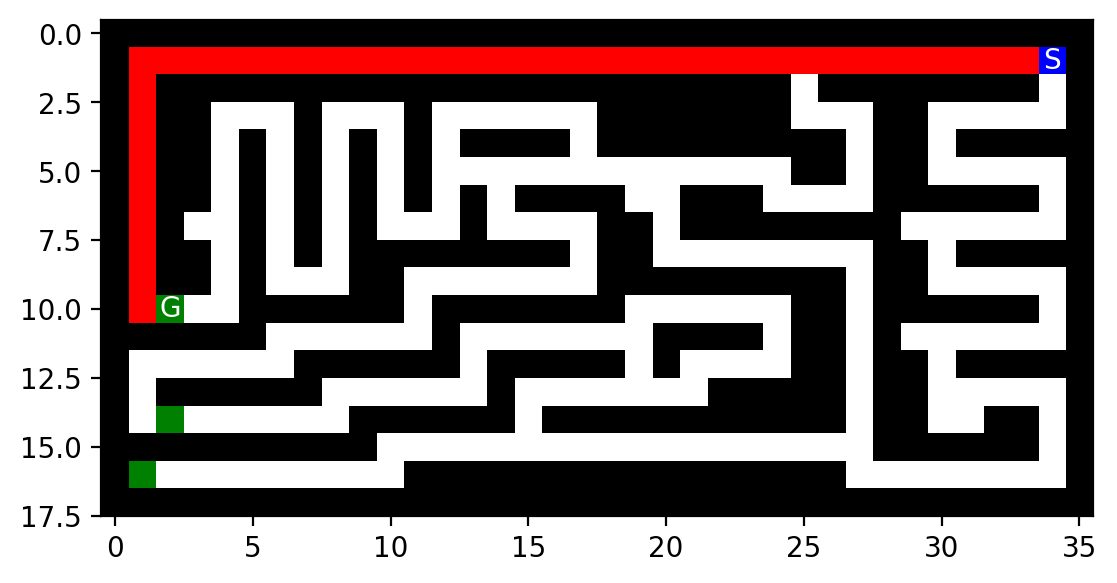

Solution Found in 80 steps. Solution cost is 68
path cost: 68 | Nodes expanded: 160 | Max tree depth 68
max nodes in memory: 87 | Max frontier size: 4


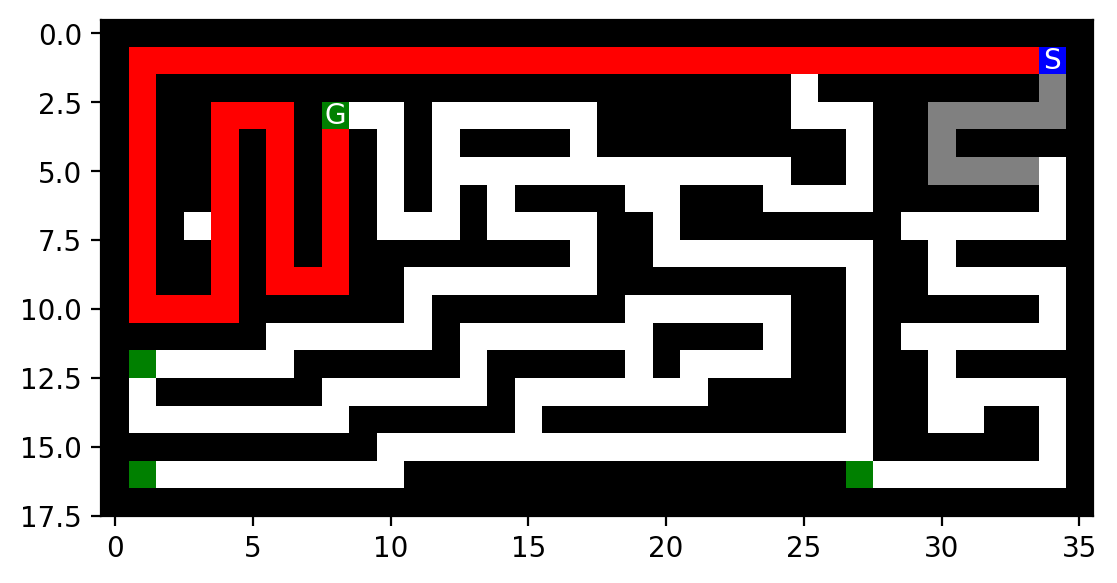

In [476]:
mh.show_maze(GBFS(M1))
mh.show_maze(GBFS(M2))
mh.show_maze(GBFS(M3))

Solution Found in 222 steps. Solution cost is 68
path cost: 68 | Nodes expanded: 453 | Max tree depth 68
max nodes in memory: 235 | Max frontier size: 8


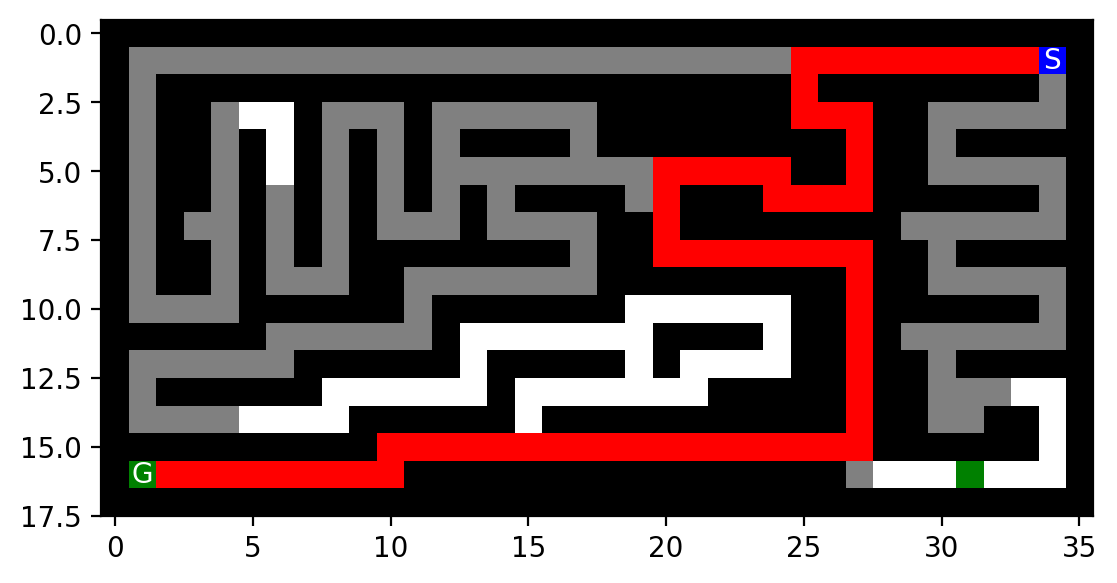

Solution Found in 56 steps. Solution cost is 43
path cost: 43 | Nodes expanded: 111 | Max tree depth 43
max nodes in memory: 61 | Max frontier size: 3


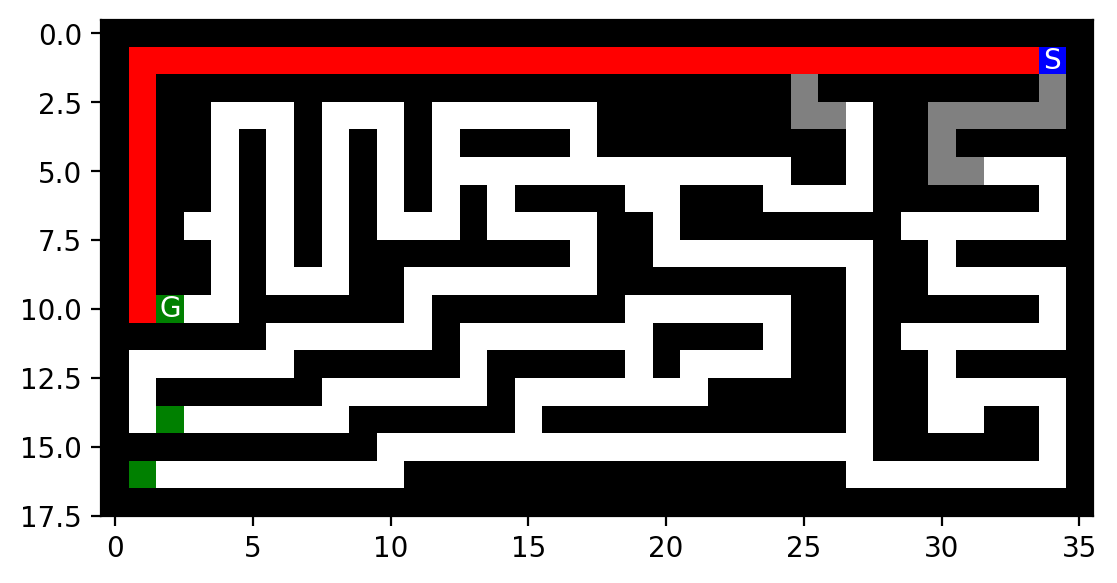

Solution Found in 97 steps. Solution cost is 42
path cost: 42 | Nodes expanded: 199 | Max tree depth 42
max nodes in memory: 106 | Max frontier size: 8


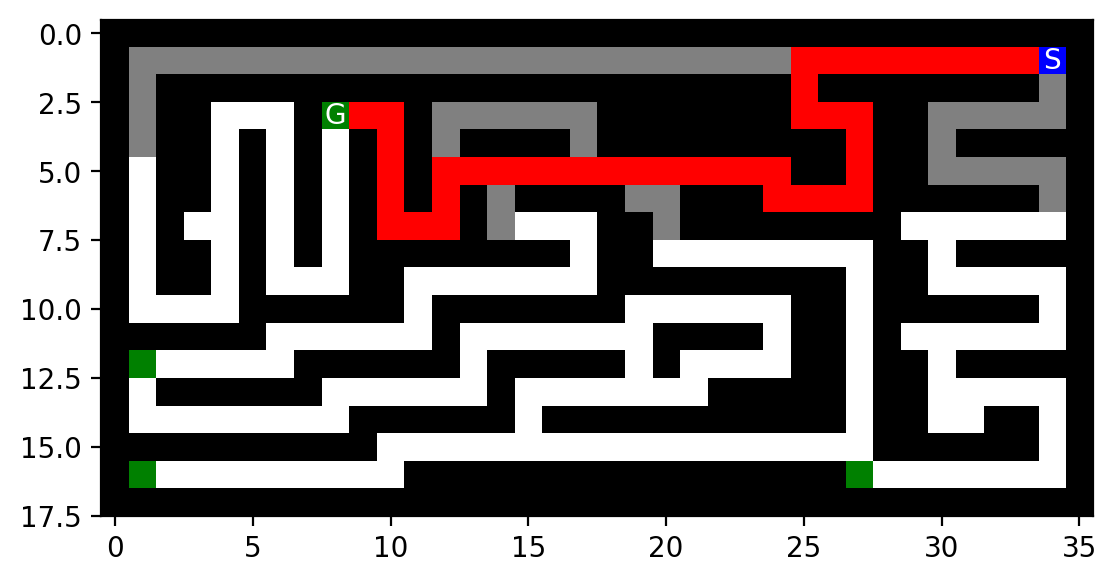

In [477]:
mh.show_maze(AStar(M1))
mh.show_maze(AStar(M2))
mh.show_maze(AStar(M3))

## Discussion
Surprisingly, most of the algorithms performed well. (Except DFS) The optimal solution was only found every time by BFS. DFS traveled via randomness until it hit a goal, which sometimes is a much longer path than necessary.
 <br>
 GBFS and A star are both sub-optimal because they use a heuristic function designed to opperate with only 1 goal in mind. Because of that, they do not seek out the other possiblities, but still may run into them by luck

I would love to implement IDFS but I am running on 5 hours of sleep after an algo engineering midterm so I instead hope that whoever is grading this has a good night. Thank you

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [478]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [479]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [480]:
# Your code/answer goes here